In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('usedcars.csv')
df.head() 

price trim isOneOwner   mileage  year   color  displacement      fuel  \
0   2988  320          f  193296.0  1995   Black           3.2  Gasoline   
1   6595  320          f  129948.0  1995   other           3.2  Gasoline   
2   7993  320          f  140428.0  1997   White           3.2  Gasoline   
3   5995  420          f  113622.0  1999  Silver           4.2  Gasoline   
4   3000  420          f  167673.0  1999  Silver           4.2  Gasoline   

  region soundSystem wheelType  
0    SoA        unsp     Alloy  
1    Mid     Premium     Alloy  
2    Mid        Bose     Alloy  
3    Mid        unsp     Alloy  
4    SoA        unsp     Alloy

In [38]:
df.shape, df.columns

((20063, 11),
 Index(['price', 'trim', 'isOneOwner', 'mileage', 'year', 'color',
        'displacement', 'fuel', 'region', 'soundSystem', 'wheelType'],
       dtype='object'))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20063 entries, 0 to 20062
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         20063 non-null  int64  
 1   trim          20063 non-null  object 
 2   isOneOwner    20063 non-null  object 
 3   mileage       20063 non-null  float64
 4   year          20063 non-null  int64  
 5   color         20063 non-null  object 
 6   displacement  20063 non-null  float64
 7   fuel          20063 non-null  object 
 8   region        20063 non-null  object 
 9   soundSystem   20063 non-null  object 
 10  wheelType     20063 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB


In [40]:
df.describe()

price        mileage          year  displacement
count  20063.000000   20063.000000  20063.000000  20063.000000
mean   30747.243682   73113.478842   2007.010018      5.058964
std    18291.084516   43075.536515      4.128162      0.628131
min      599.000000       8.000000   1994.000000      3.000000
25%    13495.000000   39888.500000   2004.000000      4.600000
50%    29454.000000   67187.000000   2007.000000      5.500000
75%    43995.000000   98213.000000   2010.000000      5.500000
max    79999.000000  488525.000000   2014.000000      6.300000

<ipython-input-42-744ced114db7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


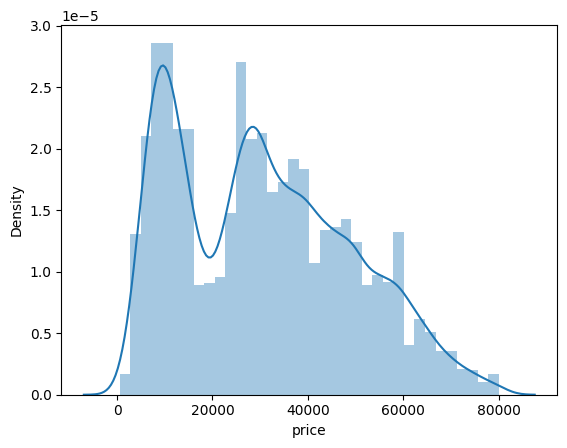

Skewness: 0.39377444151479857
Kurtosis: -0.7494983872929324


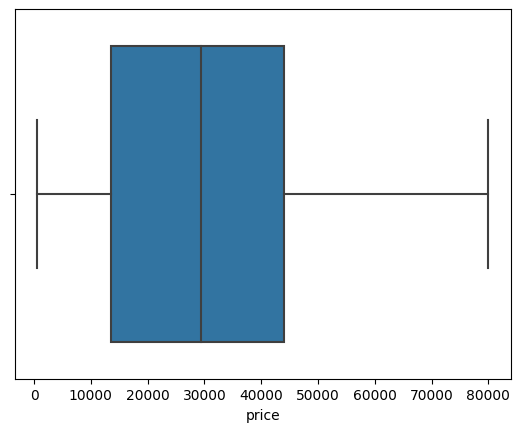

Identified outliers:
Series([], Name: price, dtype: int64)
z_scores : 0       -1.517676
1       -1.320471
2       -1.244038
3       -1.353275
4       -1.517020
           ...   
20058    2.033979
20059    0.068218
20060    0.232237
20061    0.450709
20062    0.232237
Name: price, Length: 20063, dtype: float64


In [42]:
import seaborn as sns

# Plot the distribution of the 'price' column;
sns.distplot(df['price'])
plt.show()

# Calculate skewness and kurtosis of the 'price' column;
skewness = df['price'].skew()
kurtosis = df['price'].kurt()
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Detect outliers using box plot;
sns.boxplot(x=df['price'])
plt.show()

# Detect outliers using z-score;
from scipy.stats import zscore

# z-score for 'price' column;
z_scores = zscore(df['price'])

# Set a threshold for z-score to identify outliers (z-score > 3 or z-score < -3)
outliers = df['price'][abs(z_scores) > 3]

# Print the identified outliers
print("Identified outliers:")
print(outliers)
print(f'z_scores : {z_scores}')

### The skewness value of 0.393 indicates that the distribution of prices is moderately skewed to the right (i.e., there is a longer tail on the right side of the distribution). A positive skewness value indicates that the distribution is skewed to the right, and a negative skewness value would indicate that the distribution is skewed to the left.

### The kurtosis value of -0.749 indicates that the distribution of prices is platykurtic, which means it is flatter than a normal distribution. A negative kurtosis value indicates that the distribution is flatter and has less extreme values (i.e., fewer outliers) than a normal distribution, while a positive kurtosis value indicates that the distribution is more peaked and has more extreme values (i.e., more outliers) than a normal distribution.

### Based on the skewness and kurtosis values provided above for the price variable, it appears that the distribution of prices is already reasonably close to a normal distribution.

### However, further preprocessing of the price variable may still be necessary to improve the performance of the regression models.

### One possible preprocessing step is to transform the price variable using a mathematical function. Common transformations include log transformation, square root transformation, and inverse transformation. These transformations can help to reduce skewness and make the distribution of prices more normal.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


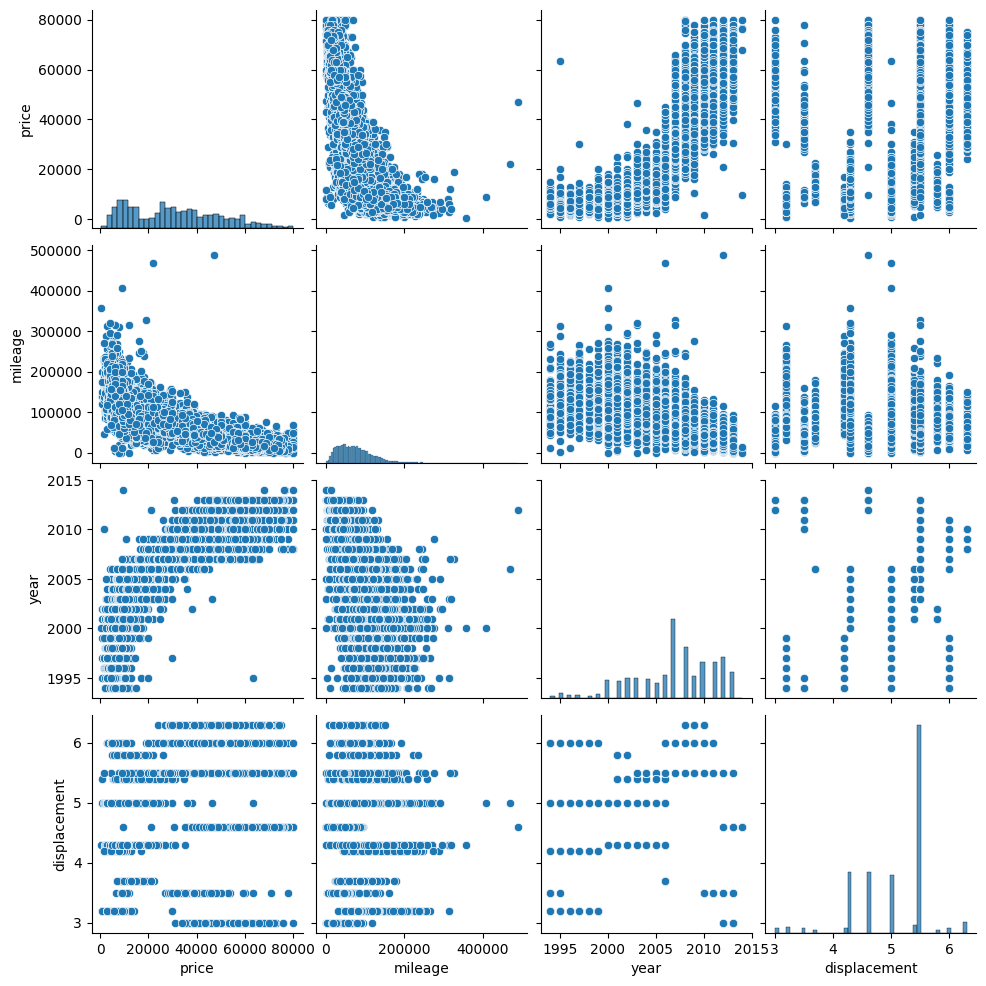

In [43]:
#Plot each feature against the others to check the relation between them
sns.pairplot(df, size =2.5)

In [44]:
df.dtypes

price             int64
trim             object
isOneOwner       object
mileage         float64
year              int64
color            object
displacement    float64
fuel             object
region           object
soundSystem      object
wheelType        object
dtype: object

In [45]:
## one-hot encoding; categotical to numerical;
df_new = pd.get_dummies(df, columns= ['trim', 'isOneOwner', 'color', 'fuel', 'region', 'soundSystem', 'wheelType'])

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled, columns=df_new.columns)

In [47]:
df_new.head()

price   mileage  year  displacement  trim_320  trim_350  trim_400  \
0   2988  193296.0  1995           3.2         1         0         0   
1   6595  129948.0  1995           3.2         1         0         0   
2   7993  140428.0  1997           3.2         1         0         0   
3   5995  113622.0  1999           4.2         0         0         0   
4   3000  167673.0  1999           4.2         0         0         0   

   trim_420  trim_430  trim_500  ...  region_WSC  soundSystem_Bang Olufsen  \
0         0         0         0  ...           0                         0   
1         0         0         0  ...           0                         0   
2         0         0         0  ...           0                         0   
3         1         0         0  ...           0                         0   
4         1         0         0  ...           0                         0   

   soundSystem_Bose  soundSystem_Harman Kardon  soundSystem_Premium  \
0                 0                          0                    0   
1                 0                          0                    1   
2                 1                          0                    0   
3                 0                          0                    0   
4                 0                          0                    0   

   soundSystem_unsp  wheelType_Alloy  wheelType_Premium  wheelType_other  \
0                 1                1                  0                0   
1                 0                1                  0                0   
2                 0                1                  0                0   
3                 1                1                  0                0   
4                 1                1                  0                0   

   wheelType_unsp  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 45 columns]

In [48]:
df_new.shape

(20063, 45)

In [49]:
df_new.columns

Index(['price', 'mileage', 'year', 'displacement', 'trim_320', 'trim_350',
       'trim_400', 'trim_420', 'trim_430', 'trim_500', 'trim_55 AMG',
       'trim_550', 'trim_600', 'trim_63 AMG', 'trim_65 AMG', 'isOneOwner_f',
       'isOneOwner_t', 'color_Black', 'color_Blue', 'color_Gray',
       'color_Silver', 'color_White', 'color_other', 'color_unsp',
       'fuel_Diesel', 'fuel_Gasoline', 'fuel_Hybrid', 'region_ENC',
       'region_ESC', 'region_Mid', 'region_Mtn', 'region_New', 'region_Pac',
       'region_SoA', 'region_WNC', 'region_WSC', 'soundSystem_Bang Olufsen',
       'soundSystem_Bose', 'soundSystem_Harman Kardon', 'soundSystem_Premium',
       'soundSystem_unsp', 'wheelType_Alloy', 'wheelType_Premium',
       'wheelType_other', 'wheelType_unsp'],
      dtype='object')

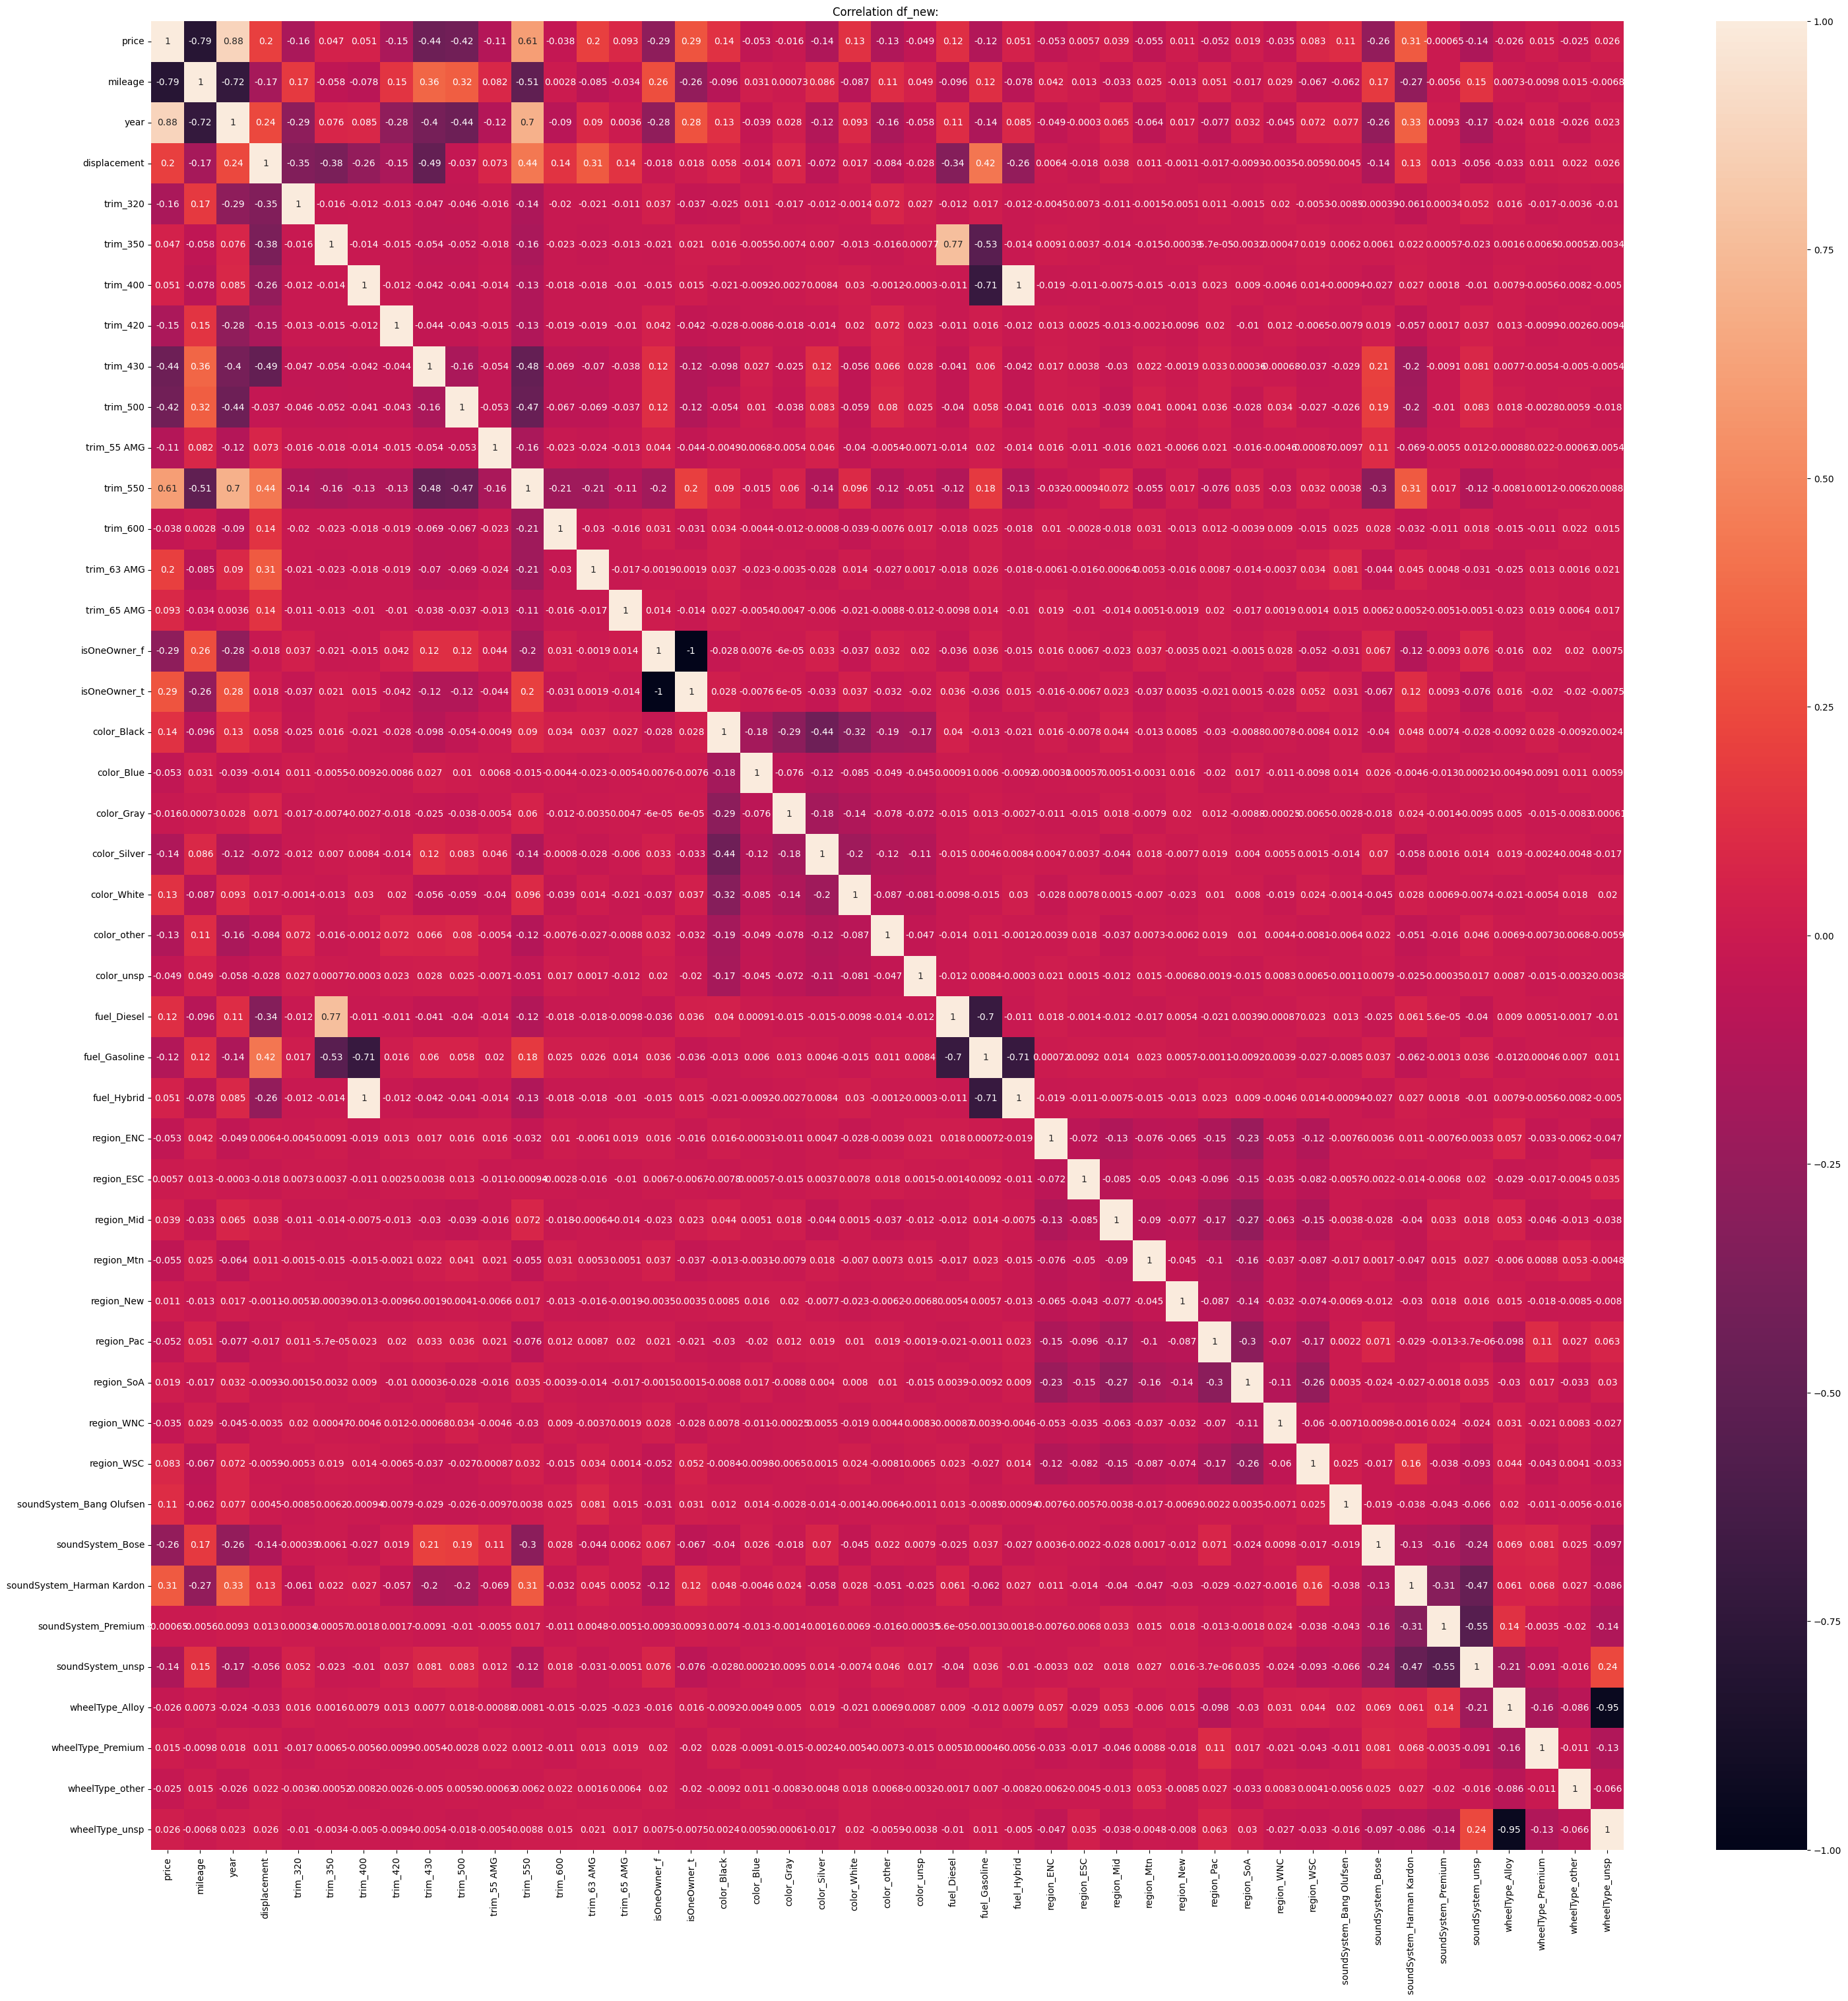

In [50]:
plt.figure(figsize=(36,36))
sns.heatmap(df_new.corr(), annot=True)
plt.title('Correlation df_new: ')
plt.show()

<ipython-input-51-8c316a7e1aa7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


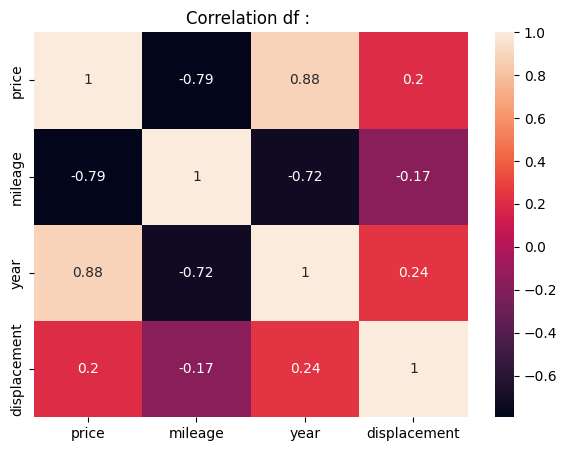

In [51]:
# Check the corrolation of data frame before one-hot encoding:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation df : ')
plt.show()

In [52]:
# Find most important features relative to price (before one-hot encoding);
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to target
price           1.000000
year            0.881949
displacement    0.202580
mileage        -0.794690
Name: price, dtype: float64


<ipython-input-52-83b26d3e75dd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [53]:
# Find most important features relative to price considering all variables;
print("Find most important features relative to target")
corr_new = df_new.corr()
corr_new.sort_values(["price"], ascending = False, inplace = True)
print(corr_new.price)

Find most important features relative to target
price                        1.000000
year                         0.881949
trim_550                     0.605759
soundSystem_Harman Kardon    0.311062
isOneOwner_t                 0.288333
displacement                 0.202580
trim_63 AMG                  0.201092
color_Black                  0.136317
color_White                  0.132859
fuel_Diesel                  0.121731
soundSystem_Bang Olufsen     0.114478
trim_65 AMG                  0.092854
region_WSC                   0.082868
trim_400                     0.050520
fuel_Hybrid                  0.050520
trim_350                     0.047048
region_Mid                   0.038773
wheelType_unsp               0.026055
region_SoA                   0.019073
wheelType_Premium            0.015405
region_New                   0.010530
region_ESC                   0.005672
soundSystem_Premium         -0.000649
color_Gray                  -0.016092
wheelType_other             -0.025244
wh

### From the analysis, we can see that the year of the car (0.881949) has the highest correlation coefficient with the price, indicating a strong positive correlation between the year of the car and its price. This suggests that newer cars are generally more expensive than older cars, which is an intuitive finding.

### Other variables that have a relatively strong positive correlation with price include trim_550 (0.605759), soundSystem_Harman Kardon (0.311062), isOneOwner_t (0.288333), and displacement (0.202580). These variables suggest that cars with certain features such as a particular trim or sound system, or cars that have only had one owner or a larger engine displacement, may be more expensive.

### On the other hand, variables with a relatively strong negative correlation with price include mileage (-0.794690), trim_430 (-0.444550), trim_500 (-0.418836), and isOneOwner_f (-0.288333). These variables suggest that cars with higher mileage, or with certain trim or ownership characteristics, may be less expensive.

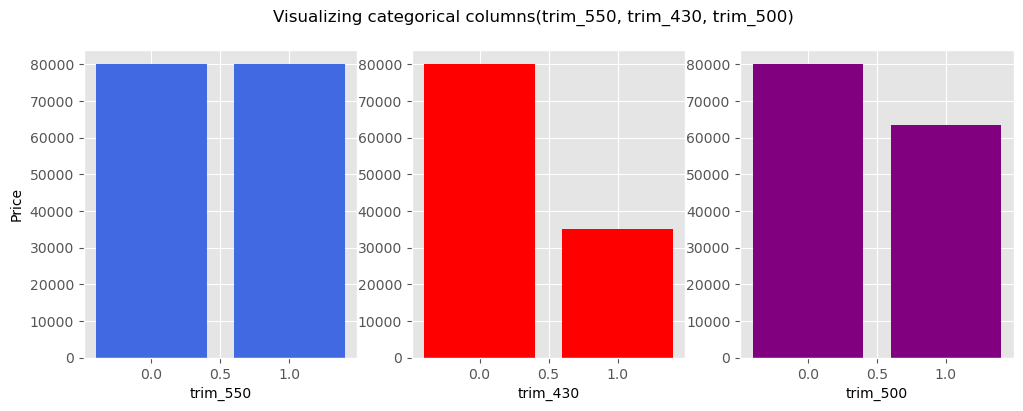

In [ ]:
from matplotlib import style

style.use('ggplot')

fig = plt.figure(figsize=(12,4))
fig.suptitle('Visualizing categorical columns(trim_550, trim_430, trim_500)')  # Visualizing maximum value of categorical columns trim_550, trim_430 and trim_500

plt.subplot(1,3,1)
plt.bar(df_new['trim_550'], df_new['price'], color='royalblue')
plt.xlabel("trim_550")
plt.ylabel("Price")

plt.subplot(1,3,2)
plt.bar(df_new['trim_430'], df_new['price'], color='red')
plt.xlabel("trim_430")

plt.subplot(1,3,3)
plt.bar(df_new['trim_500'], df_new['price'], color='purple')
plt.xlabel('trim_500')

plt.show()

<Axes: xlabel='trim_500', ylabel='price'>

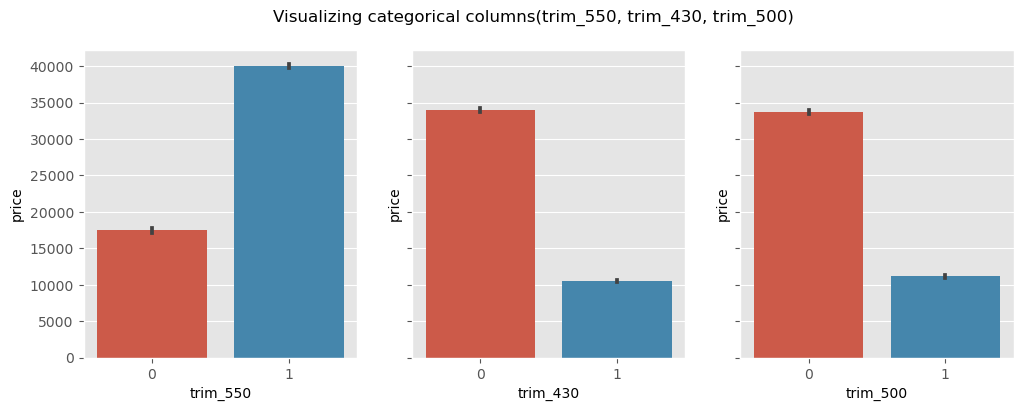

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(12,4), sharey=True)
fig.suptitle('Visualizing categorical columns(trim_550, trim_430, trim_500)')  # Visualizing minimum value of categorical columns of trim_550, trim_430 and trim_500;
sns.barplot(x=df_new['trim_550'], y=df_new['price'], ax=axes[0])
sns.barplot(x=df_new['trim_430'], y=df_new['price'], ax=axes[1])
sns.barplot(x=df_new['trim_500'], y=df_new['price'], ax=axes[2])

In [54]:
df_new['trim_550'].describe()

count    20063.000000
mean         0.589393
std          0.491956
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: trim_550, dtype: float64

In [55]:
print(df_new['trim_550'].value_counts()[1])
print(df_new['trim_500'].value_counts()[1])
print(df_new['trim_430'].value_counts()[1])

11825
2661
2787


In [56]:
# considering top variables whose correlation score is > 40%; 
df_f1 = df_new[['price', 'mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].copy()
df_f1.head()

price   mileage  year  trim_550  trim_430  trim_500
0   2988  193296.0  1995         0         0         0
1   6595  129948.0  1995         0         0         0
2   7993  140428.0  1997         0         0         0
3   5995  113622.0  1999         0         0         0
4   3000  167673.0  1999         0         0         0

In [57]:
df_f1 = df_f1[['price','mileage','year']].to_numpy()
temp = df_new[['trim_550', 'trim_430', 'trim_500']].to_numpy()

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_f1)

In [60]:
print(df_scaled[:5])

[[-1.51767576  2.79011072 -2.90936216]
 [-1.32047094  1.31944817 -2.90936216]
 [-1.24403836  1.56274777 -2.42487295]
 [-1.35327463  0.94043009 -1.94038374]
 [-1.51701968  2.19525711 -1.94038374]]


In [61]:
df_f1 = np.concatenate((df_scaled,temp), axis=1)
print(df_f1[:5])

[[-1.51767576  2.79011072 -2.90936216  0.          0.          0.        ]
 [-1.32047094  1.31944817 -2.90936216  0.          0.          0.        ]
 [-1.24403836  1.56274777 -2.42487295  0.          0.          0.        ]
 [-1.35327463  0.94043009 -1.94038374  0.          0.          0.        ]
 [-1.51701968  2.19525711 -1.94038374  0.          0.          0.        ]]


In [62]:
df_f1 = pd.DataFrame(df_f1, columns=['price', 'mileage', 'year', 'trim_550', 'trim_430', 'trim_500'])

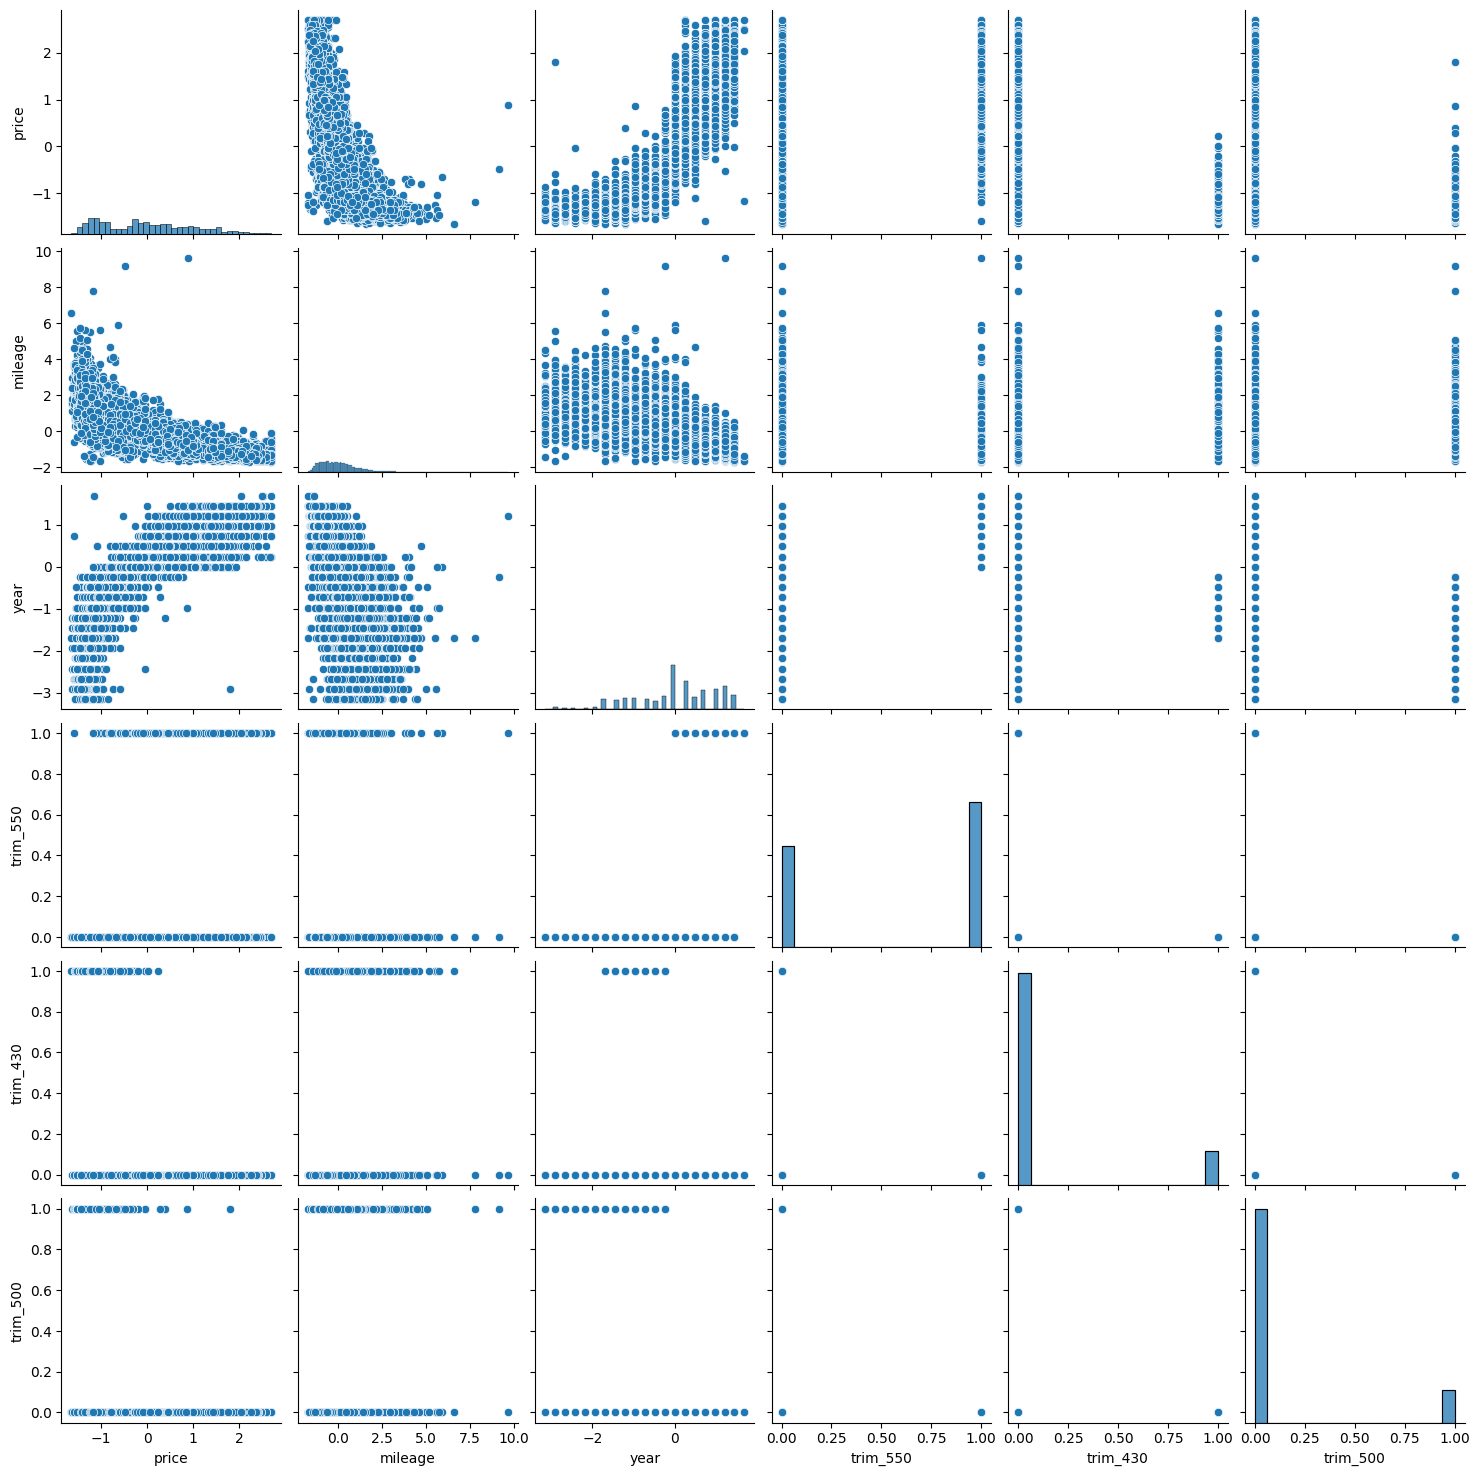

In [63]:
import seaborn as sns
sns.pairplot(df_f1, height=2.5)

In [64]:
# considering only numerical varibales whose coorelation score is greater than 40% ;

df_f2 = df_f1[['price', 'mileage', 'year']].copy()
df_f2.head()

price   mileage      year
0 -1.517676  2.790111 -2.909362
1 -1.320471  1.319448 -2.909362
2 -1.244038  1.562748 -2.424873
3 -1.353275  0.940430 -1.940384
4 -1.517020  2.195257 -1.940384

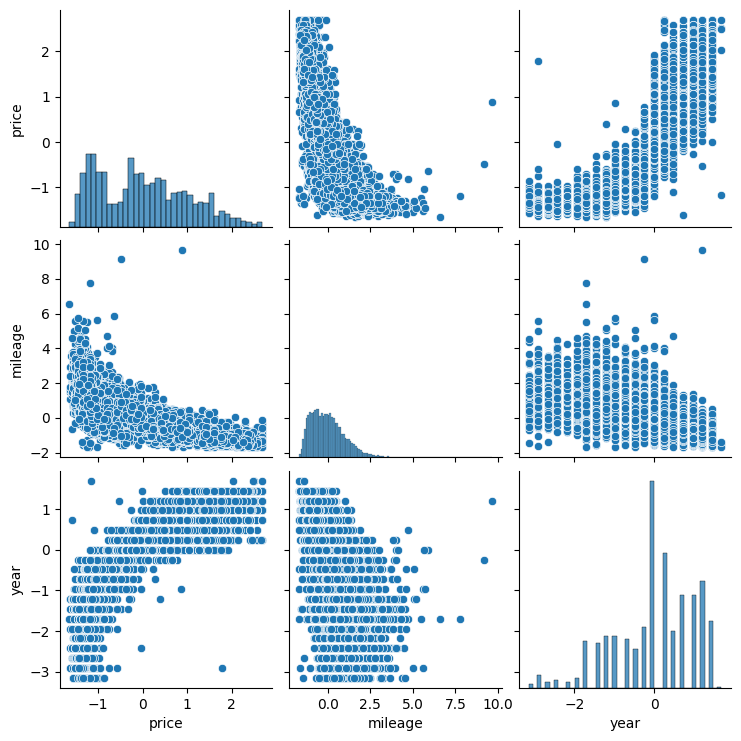

In [65]:
sns.pairplot(df_f2, height=2.5)

## **LINEAR REGRESSION**

Mean squared error: 0.14
Root mean squared error(df_f1): 0.38
R-squared(df_f1): 0.85
Mean absolute error(df_f1): 0.29
Linear regression score(df_f1): 0.85


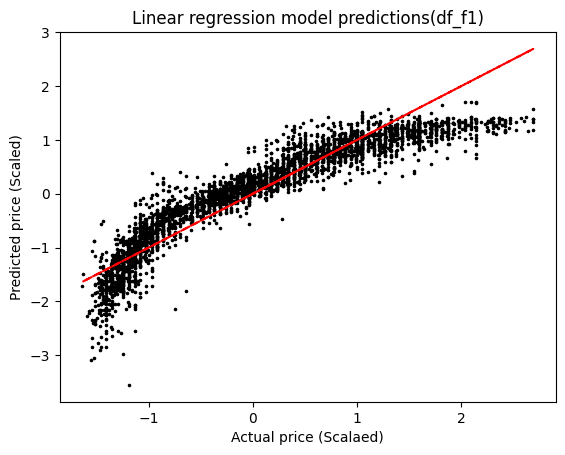

In [70]:
#### Linear Regression for dataframe df_f1;

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# train the model on the training set;
lr = LinearRegression()
lr.fit(X_train, y_train)

# predict on the test set;
y_pred = lr.predict(X_test)

# compute the mean squared error;
mse = mean_squared_error(y_test, y_pred)

# compute the linear regression score
lr.score(X_test, y_test)

print("Mean squared error: {:.2f}".format(mse))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f1): {:.2f}".format(rmse))
print("R-squared(df_f1): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f1): {:.2f}".format(mae))
print("Linear regression score(df_f1): {:.2f}".format(lr.score(X_test, y_test)))

# plot the predictions vs the actual values;
plt.scatter(y_test, y_pred, s = 2.5, c='black')
plt.plot(y_test,y_test, '--r') 
plt.xlabel("Actual price (Scalaed)")
plt.ylabel("Predicted price (Scaled)")
plt.title("Linear regression model predictions(df_f1)")
plt.show()

### The mean squared error (MSE) of the model is 0.14, which indicates that the average squared difference between the predicted and actual price values is 0.14. The root mean squared error (RMSE) is 0.38, which is the square root of the MSE and provides a measure of the average difference between the predicted and actual price values.

### The R-squared value (0.85) measures the proportion of the variance in the target variable (price) that is explained by the model. An R-squared value of 1 indicates that the model explains all of the variance in the target variable, while a value of 0 indicates that the model does not explain any of the variance. In this case, the model explains 85% of the variance in the price of used cars, which is a relatively high value and suggests that the model is a good fit for the data.

### The mean absolute error (MAE) is 0.29, which provides an alternative measure of the average difference between the predicted and actual price values. The linear regression score (0.85) is the coefficient of determination, which is another measure of how well the model fits the data. A value of 1 indicates a perfect fit, while a value of 0 indicates no fit.

### Overall, the results suggest that the linear regression model performs well in predicting the price of used cars based on the selected features. 

Mean squared error: 0.16
Root mean squared error(df_f2): 0.40
R-suared(df_f2): 0.83
Mean absolute error(df_f2): 0.31
Linear regression score(df_f2): 0.83


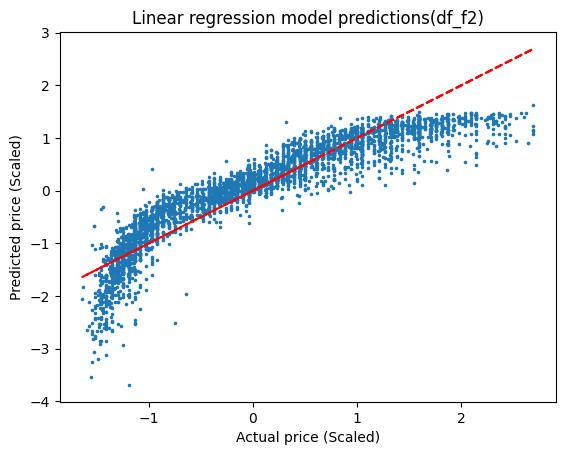

In [71]:
#### Linear Regression for dataframe df_f2;

# Select relevant features and split into train/test sets
X = df_f2[['mileage', 'year']].values
y = df_f2['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set and compute the mean squared error
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f2): {:.2f}".format(rmse))
print("R-suared(df_f2): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f2): {:.2f}".format(mae))
print("Linear regression score(df_f2): {:.2f}".format(lr.score(X_test, y_test)))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred, s = 2.5)
plt.plot(y_test, y_test, '--r') 
plt.xlabel("Actual price (Scaled)")
plt.ylabel("Predicted price (Scaled)")
plt.title("Linear regression model predictions(df_f2)")
plt.show()

### The second linear regression model includes only two features ('mileage', 'year'), which are the two most important features relative to the target variable, according to the previous analysis. The model's performance is still quite good, with a root mean squared error of *0.40* and an R-squared value of *0.83*. However, it is slightly less accurate than the previous model that included additional features, as evidenced by the slightly higher root mean squared error and lower R-squared value.
### It is worth noting that the second model is simpler and more interpretable, as it includes only two features. This could be useful in certain contexts where model interpretability is important, even if it comes at the cost of slightly reduced accuracy. Ultimately, the choice of which model to use will depend on the specific goals and requirements of the analysis.

Mean squared error: 0.08
Root mean squared error(df_f1): 0.27
R-suared(df_f1): 0.92
Mean absolute error(df_f1): 0.19
Linear regression score(df_f1): 0.92


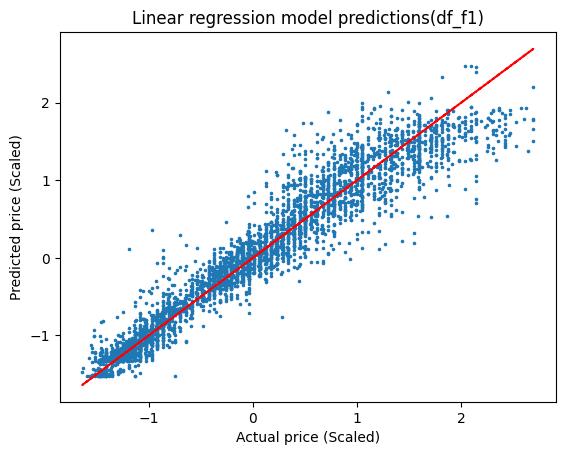

In [72]:
#### Polynomial Regression for dataframe df_f1;
from sklearn.preprocessing import PolynomialFeatures

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
# create a polynomial features object with degree 2
poly = PolynomialFeatures(degree=2)

# fit and transform the independent variables to create polynomial features
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=42)

# create a linear regression object
lr = LinearRegression()

# fit the polynomial regression model to the data
lr.fit(X_train, y_train )

# Predict on the test set and compute the mean squared error
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f1): {:.2f}".format(rmse))
print("R-suared(df_f1): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f1): {:.2f}".format(mae))
print("Linear regression score(df_f1): {:.2f}".format(lr.score(X_test, y_test)))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred, s = 2.5)
plt.plot(y_test, y_test, '--r') 
plt.xlabel("Actual price (Scaled)")
plt.ylabel("Predicted price (Scaled)")
plt.title("Linear regression model predictions(df_f1)")
plt.show()

### The results of the polynomial regression model show a significant improvement over the linear regression models. The mean squared error, root mean squared error, and mean absolute error are all lower for the polynomial regression model. Additionally, the R-squared value is higher, indicating that the model explains a greater proportion of the variability in the target variable, price.

### Compared to the previous models, the polynomial regression model performs better in terms of prediction accuracy. This is likely due to the fact that the polynomial regression model is able to capture the nonlinear relationship between the independent variables and the dependent variable better than the linear regression models.

### Overall, the polynomial regression model seems to be a better choice for this dataset, as it provides better predictions of the target variable. However, it's worth noting that adding more features to the model could potentially lead to overfitting, so it's important to carefully select the features that are most relevant to the problem at hand.

Mean squared error: 0.09
Root mean squared error(df_f2): 0.30
R-suared(df_f2): 0.91
Mean absolute error(df_f2): 0.21
Linear regression score(df_f2): 0.91


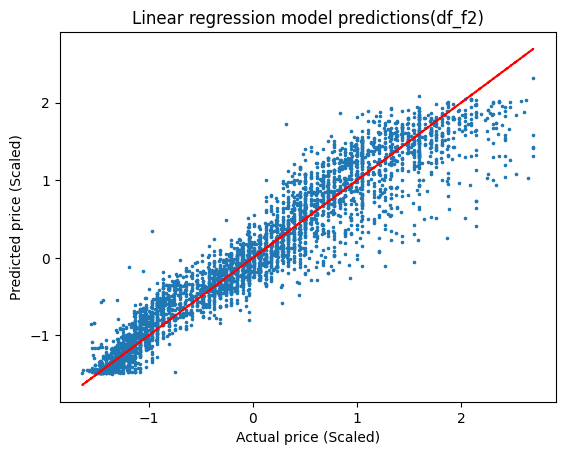

In [73]:
#### Polynomial Regression for dataframe df_f2;

# Select relevant features and split into train/test sets
X = df_f2[['mileage', 'year']].values
y = df_f2['price'].values
# create a polynomial features object with degree 2
poly = PolynomialFeatures(degree=2)

# fit and transform the independent variables to create polynomial features
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=42)

# create a linear regression object
lr = LinearRegression()

# fit the polynomial regression model to the data
lr.fit(X_train, y_train )

# Predict on the test set and compute the mean squared error
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f2): {:.2f}".format(rmse))
print("R-suared(df_f2): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f2): {:.2f}".format(mae))
print("Linear regression score(df_f2): {:.2f}".format(lr.score(X_test, y_test)))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred, s = 2.5)
plt.plot(y_test, y_test, '--r') 
plt.xlabel("Actual price (Scaled)")
plt.ylabel("Predicted price (Scaled)")
plt.title("Linear regression model predictions(df_f2)")
plt.show()

### The polynomial regression model with the features 'mileage', 'year', 'trim_550', 'trim_430', 'trim_500' has a lower mean squared error, root mean squared error, and mean absolute error than the linear regression models. This indicates that the polynomial regression model is better at predicting the target variable, price, compared to the linear regression models.

### The R-squared value of the polynomial regression model with the features 'mileage', 'year', 'trim_550', 'trim_430', 'trim_500' is 0.92 which means that 92% of the variability in the target variable, price, can be explained by the independent variables in the model. This value is higher than the R-squared values of the linear regression models, indicating that the polynomial regression model is a better fit for the data.

### Similarly, the polynomial regression model with the features 'mileage', 'year' also has a lower mean squared error, root mean squared error, and mean absolute error than the linear regression models. The R-squared value of this model is also higher than the linear regression models, but slightly lower than the polynomial regression model with additional features. This suggests that including additional features in the model can improve its predictive power.

### Overall, the polynomial regression models outperform the linear regression models in predicting the price of used cars based on the given features.

# ** Ridge Regularization ** # 

Mean squared error: 0.14
Root mean squared error(df_f1): 0.38
R-suared(df_f1): 0.85
Mean absolute error(df_f1): 0.29
Ridge regression score(df_f1): 0.85


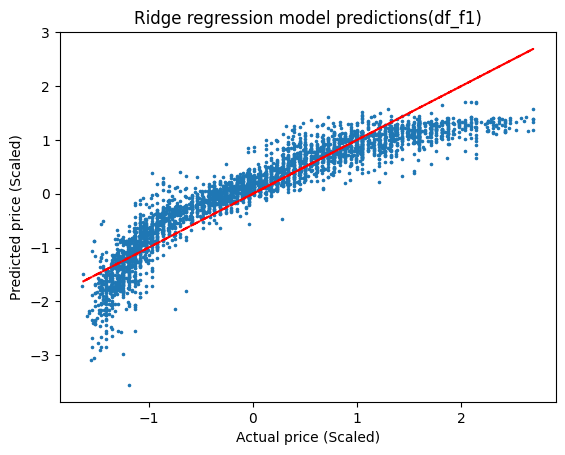

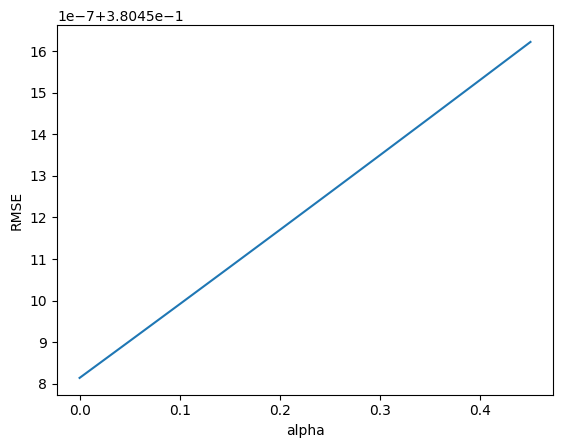

In [101]:
#### Ridge Regression for dataframe df_f1;
from sklearn.linear_model import Ridge

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


rr = Ridge(alpha=0.05, solver="cholesky")
rr.fit(X_train, y_train)

# Predict on the test set and compute the mean squared error
y_pred = rr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f1): {:.2f}".format(rmse))
print("R-suared(df_f1): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f1): {:.2f}".format(mae))
print("Ridge regression score(df_f1): {:.2f}".format(rr.score(X_test, y_test)))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred, s = 2.5)
plt.plot(y_test, y_test, '--r') 
plt.xlabel("Actual price (Scaled)")
plt.ylabel("Predicted price (Scaled)")
plt.title("Ridge regression model predictions(df_f1)")
plt.show()

print("\n")

rmse_alpha = []
alpha_val = np.arange(0,0.5,0.05) 
for a in alpha_val :
    rr = Ridge(alpha=a, solver="cholesky")
    rr.fit(X_train, y_train)
    y_pred = rr.predict(X_test)
    rmse_alpha.append(mean_squared_error(y_test, y_pred, squared=False))

plt.plot(alpha_val, rmse_alpha)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

Mean squared error: 0.16
Root mean squared error(df_f2): 0.40
R-suared(df_f2): 0.83
Mean absolute error(df_f2): 0.31
Ridge regression score(df_f2): 0.83


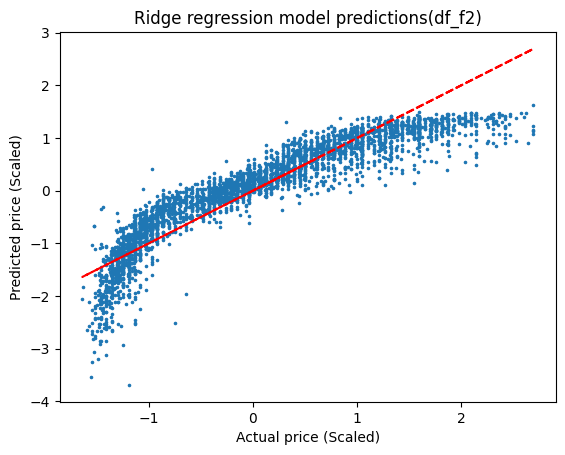

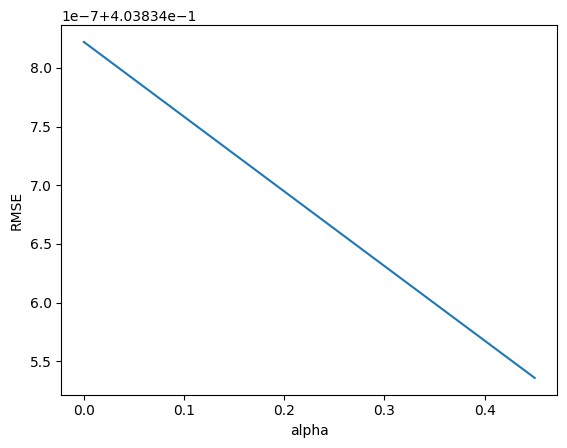

In [102]:
#### Ridge Regression for dataframe df_f2;

# performs split into train/test sets;
X = df_f2[['mileage', 'year']].values
y = df_f2['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rr = Ridge(alpha=0.5, solver="cholesky")
rr.fit(X_train, y_train)

# Predict on the test set and compute the mean squared error
y_pred = rr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f2): {:.2f}".format(rmse))
print("R-suared(df_f2): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f2): {:.2f}".format(mae))
print("Ridge regression score(df_f2): {:.2f}".format(rr.score(X_test, y_test)))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred, s = 2.5)
plt.plot(y_test, y_test, '--r') 
plt.xlabel("Actual price (Scaled)")
plt.ylabel("Predicted price (Scaled)")
plt.title("Ridge regression model predictions(df_f2)")
plt.show()

print("\n")

rmse_alpha = []
alpha_val = np.arange(0,0.5,0.05) 
for a in alpha_val :
    rr = Ridge(alpha=a, solver="cholesky")
    rr.fit(X_train, y_train)
    y_pred = rr.predict(X_test)
    rmse_alpha.append(mean_squared_error(y_test, y_pred, squared=False))

plt.plot(alpha_val, rmse_alpha)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

### Ridge regression is a type of linear regression where a regularization term is added to the loss function in order to prevent overfitting. The regularization term shrinks the coefficients towards zero, making the model more robust to the noise in the data. However, this comes at the cost of biasing the estimates of the coefficients, which can reduce the accuracy of the model.

### In this case, it seems that the ridge regression did not perform better than the linear regression models you tried. This could be because the models were not overfitting to begin with, and so the regularization term did not provide any significant benefits. Alternatively, it could be that the regularization term was too strong, causing the model to become too biased and lose accuracy.

# ** LASSO ** #

Mean squared error: 0.16
Root mean squared error(df_f1): 0.41
R-suared(df_f1): 0.83
Mean absolute error(df_f1): 0.31
Lasso regression score(df_f1): 0.83


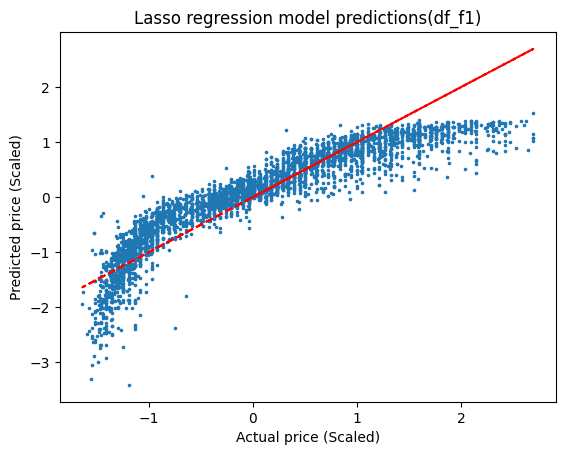

<ipython-input-82-d529a3a1ed2c>:37: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lar.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+03, tolerance: 1.615e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


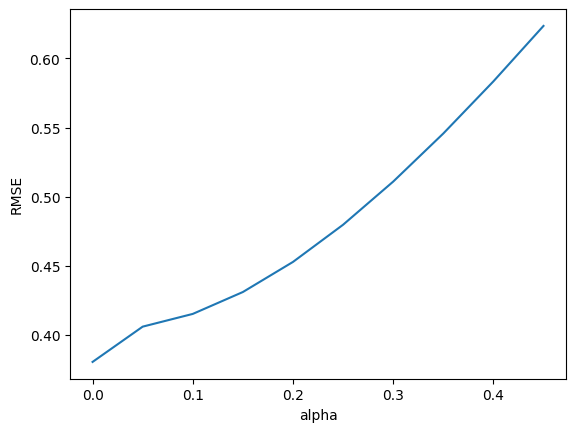

In [82]:
#### Lasso Regression for dataframe df_f1;
from sklearn.linear_model import Lasso

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


lar = Lasso(alpha=0.05, random_state = 42)
lar.fit(X_train, y_train)

# Predict on the test set and compute the mean squared error
y_pred = lar.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f1): {:.2f}".format(rmse))
print("R-suared(df_f1): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f1): {:.2f}".format(mae))
print("Lasso regression score(df_f1): {:.2f}".format(lar.score(X_test, y_test)))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred, s = 2.5)
plt.plot(y_test, y_test, '--r') 
plt.xlabel("Actual price (Scaled)")
plt.ylabel("Predicted price (Scaled)")
plt.title("Lasso regression model predictions(df_f1)")
plt.show()

rmse_alpha = []
alpha_val = np.arange(0,0.5,0.05) 
for a in alpha_val :
    lar = Lasso(alpha=a, random_state = 42)
    lar.fit(X_train, y_train)
    y_pred = lar.predict(X_test)
    rmse_alpha.append(mean_squared_error(y_test, y_pred, squared=False))

plt.plot(alpha_val, rmse_alpha)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

Mean squared error: 0.16
Root mean squared error(df_f2): 0.41
R-suared(df_f2): 0.83
Mean absolute error(df_f2): 0.31
Lasso regression score(df_f2): 0.83


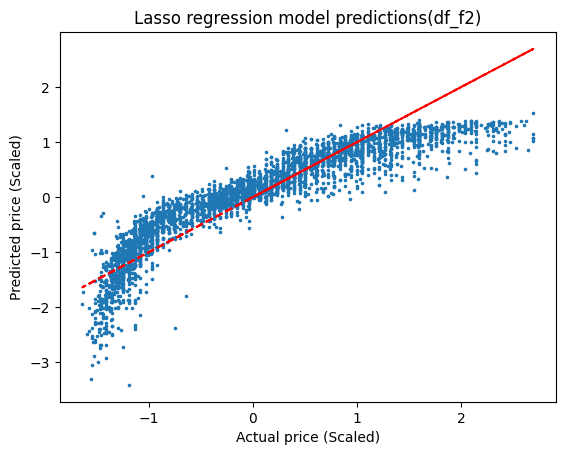

<ipython-input-83-726512136c15>:36: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lar.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+03, tolerance: 1.615e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


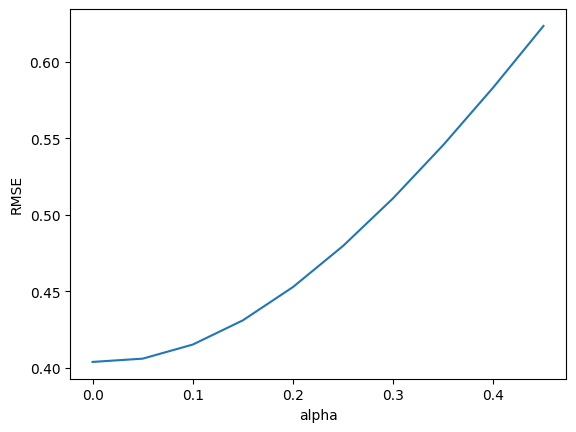

In [83]:
#### Lasso Regression for dataframe df_f2;

# performs split into train/test sets;
X = df_f1[['mileage', 'year']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


lar = Lasso(alpha=0.05, random_state = 42)
lar.fit(X_train, y_train)

# Predict on the test set and compute the mean squared error
y_pred = lar.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f2): {:.2f}".format(rmse))
print("R-suared(df_f2): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f2): {:.2f}".format(mae))
print("Lasso regression score(df_f2): {:.2f}".format(lar.score(X_test, y_test)))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred, s = 2.5)
plt.plot(y_test, y_test, '--r') 
plt.xlabel("Actual price (Scaled)")
plt.ylabel("Predicted price (Scaled)")
plt.title("Lasso regression model predictions(df_f2)")
plt.show()

rmse_alpha = []
alpha_val = np.arange(0,0.5,0.05) 
for a in alpha_val :
    lar = Lasso(alpha=a, random_state = 42)
    lar.fit(X_train, y_train)
    y_pred = lar.predict(X_test)
    rmse_alpha.append(mean_squared_error(y_test, y_pred, squared=False))

plt.plot(alpha_val, rmse_alpha)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

### Lasso regression adds an L1 penalty to the cost function, which tends to shrink the less important feature coefficients towards zero, effectively performing feature selection by setting some coefficients to zero.

### However, in some cases, this could lead to underfitting, where the model is too simple and cannot capture the complexity of the data. It is possible that in our case, the Lasso regression is over-penalizing some features that are actually important for the model, resulting in a worse performance compared to the linear regression.

### In general, Lasso regularization is more effective when dealing with high-dimensional datasets with many features, where feature selection is necessary to reduce the risk of overfitting. If you have a smaller number of features, or if you know that all features are important for the model, then Lasso regularization may not be the best choice. In such cases, Ridge regularization or even simple linear regression may provide better results.

# **Nonlinear Regression Models**

## ** Decision Tree

RMSE 5 3: 0.337
RMSE 5 5: 0.280
RMSE 5 7: 0.265
RMSE 5 9: 0.270
RMSE 10 3: 0.337
RMSE 10 5: 0.280
RMSE 10 7: 0.265
RMSE 10 9: 0.269
RMSE 15 3: 0.337
RMSE 15 5: 0.280
RMSE 15 7: 0.265
RMSE 15 9: 0.269
RMSE 20 3: 0.337
RMSE 20 5: 0.280
RMSE 20 7: 0.265
RMSE 20 9: 0.268


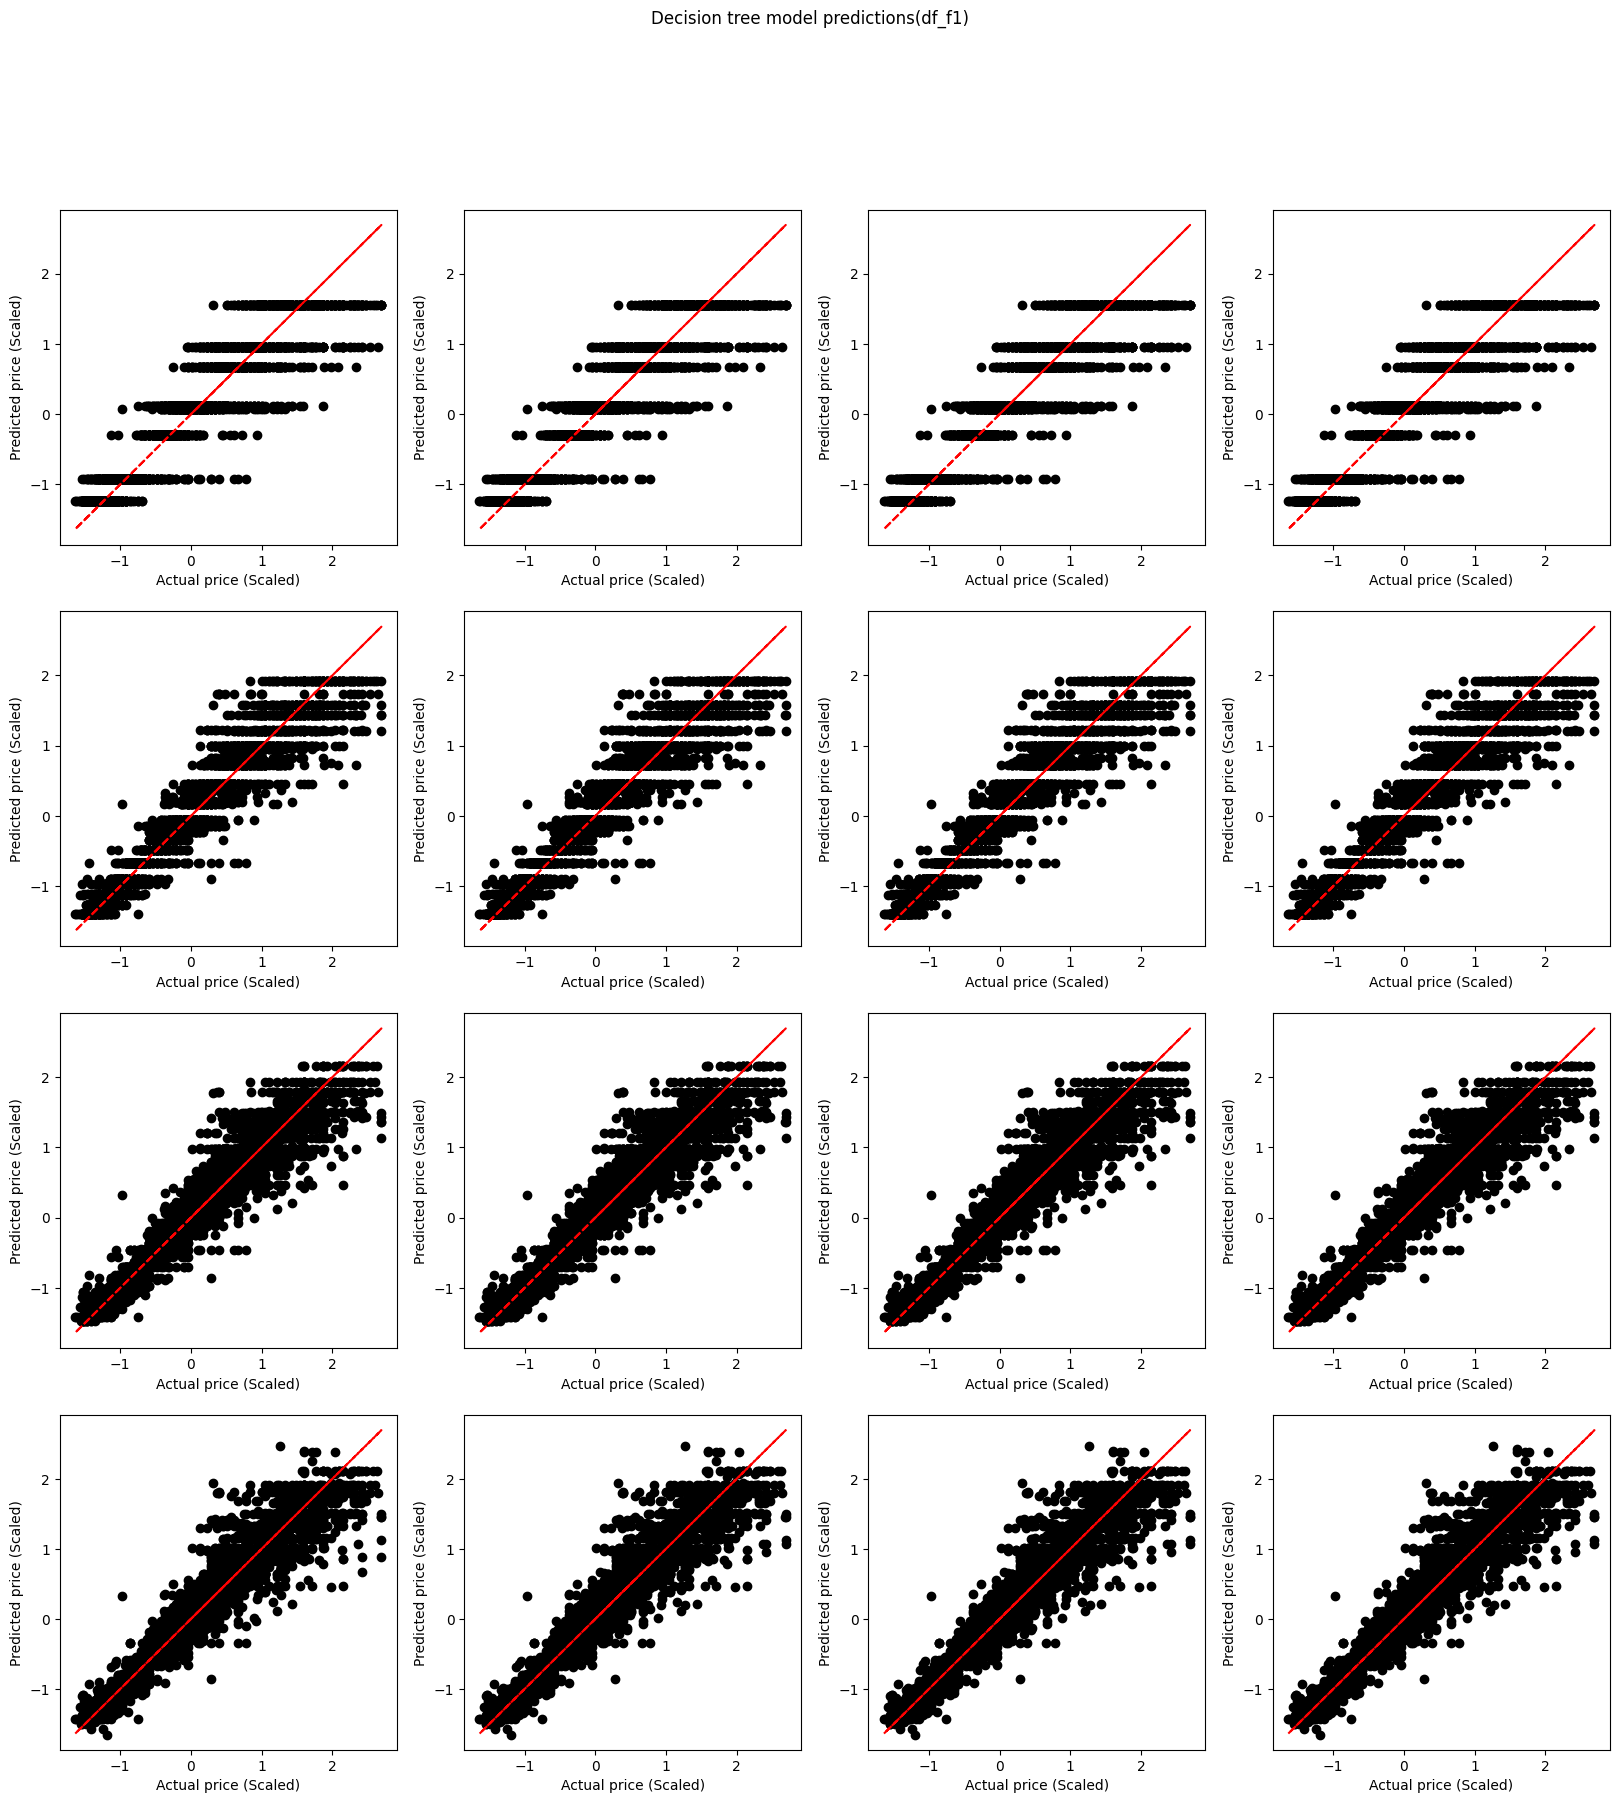

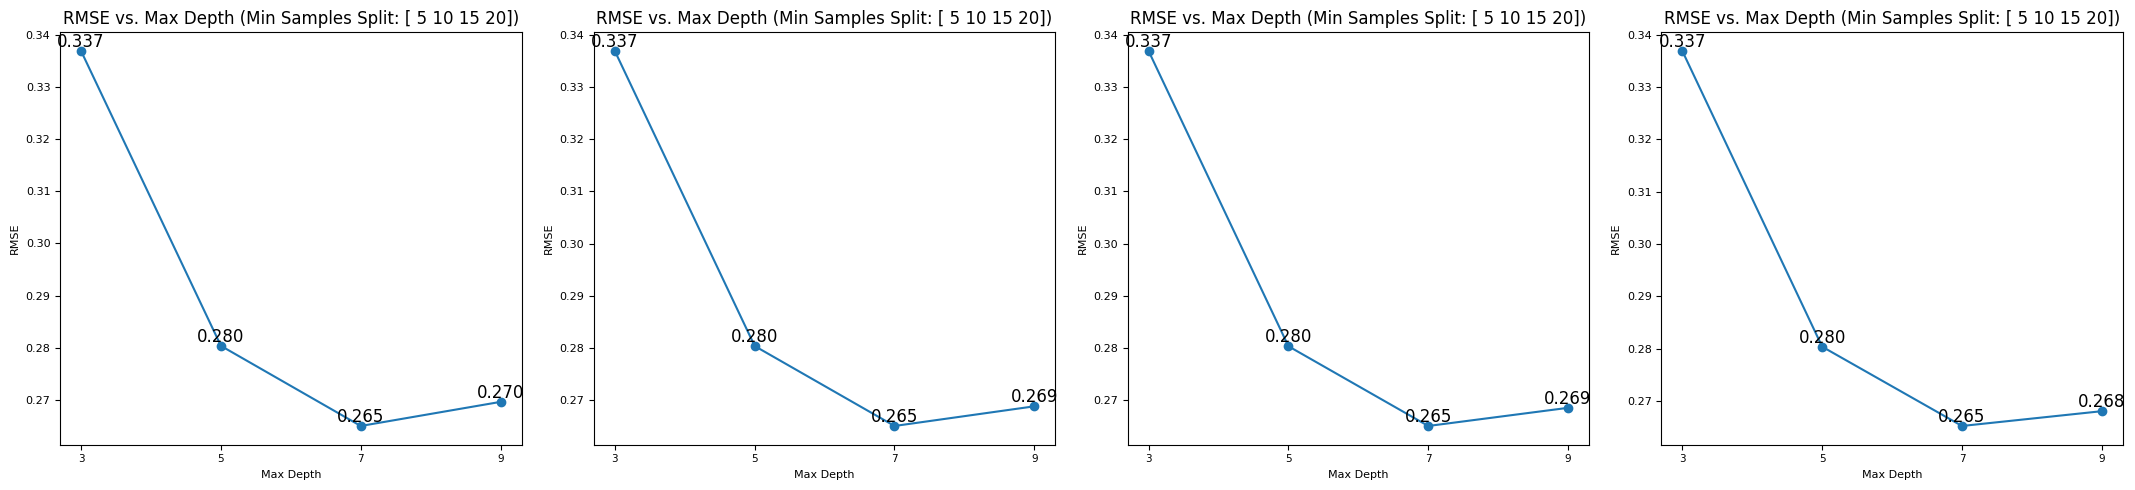

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create list of different max depths and min samples split;
max_d_list = np.arange(3,10,2)
min_ss_list = np.arange(5,21,5)

# train models and calculate RMSEs for each hidden layer size and activation function;
rmse_dict = {min_ss: [] for min_ss in min_ss_list}

#fig, axs = plt.subplots(5, 3, figsize=(20, 20))
fig, axs = plt.subplots(nrows=len(max_d_list), ncols=len(min_ss_list), figsize=(20,20))
fig.suptitle('Decision tree model predictions(df_f1)')  

for i, min_ss in enumerate(min_ss_list):
    for j, max_d in enumerate(max_d_list):
        dt = DecisionTreeRegressor(max_depth=max_d, min_samples_split=min_ss, random_state=42)
        dt.fit(X_train, y_train)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        mse_test = mean_squared_error(y_pred, y_test)
        rmse_test = math.sqrt(mse_test)
        rmse_dict[min_ss].append(rmse_test)
        #print(f'MSE {min_ss} {max_d}: {mse_test:.3f}')
        print(f'RMSE {min_ss} {max_d}: {rmse_test:.3f}')
        
        # Plot the predictions against the actual values
        axs[j,i].plot(y_test, y_pred,'o', c='black')
        axs[j,i].plot(y_test, y_test, '--r') 
        axs[j,i].set_xlabel("Actual price (Scaled)")
        axs[j,i].set_ylabel("Predicted price (Scaled)")
        #axs[j,i].set_title("Neural model predictions(df_f2)")
plt.show()        
        
print("\n")                                                                                           ############.  added this line to create gap 
        
# plot RMSE vs hidden layer sizes for each activation function;
fig, axs = plt.subplots(1, ncols=len(min_ss_list), figsize=(21.5, 5))

for i, min_ss in enumerate(min_ss_list):
    axs[i].plot([str(x) for x in max_d_list], rmse_dict[min_ss], '-o')
    axs[i].set_xlabel('Max Depth', fontsize=8)
    axs[i].set_ylabel('RMSE', fontsize=8)
    axs[i].set_title(f'RMSE vs. Max Depth (Min Samples Split: {min_ss_list})', fontsize=12)  #######'activation' was not defined ###. change with min_ss_list
    axs[i].tick_params(axis='x', labelsize=7.5)
    axs[i].tick_params(axis='y', labelsize=8)
    
    # add text annotations to the plot
    for x, y in zip(max_d_list, rmse_dict[min_ss]):
        axs[i].text(str(x), y, f'{y:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [87]:
# Create a DecisionTreeRegressor object and specify hyperparameters
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse_test = math.sqrt(mse_test)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f2): {:.2f}".format(rmse))
print("R-suared(df_f2): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f2): {:.2f}".format(mae))

Mean Squared Error: 0.07860471151709114
Root mean squared error(df_f2): 0.28
R-suared(df_f2): 0.92
Mean absolute error(df_f2): 0.19


### The min_samples_split parameter controls the minimum number of samples required to split an internal node, while the max_depth parameter controls the maximum depth of the decision tree. By varying these hyperparameters, you are exploring different settings for the decision tree model.

### From the results you provided, it appears that increasing the max_depth parameter generally leads to lower RMSE values, except for a slight increase in RMSE for max_depth = 9 compared to max_depth = 7. This suggests that increasing the depth of the decision tree beyond a certain point may lead to overfitting and decreased performance.

### On the other hand, changing the min_samples_split parameter does not seem to have a large impact on the RMSE values. In general, larger values of min_samples_split may lead to simpler trees with fewer splits, which could reduce overfitting, but also reduce the model's ability to capture complex relationships in the data.

### Overall, it's important to balance the complexity of the decision tree with its ability to capture the patterns in the data. You may want to try different combinations of hyperparameters and evaluate their performance using cross-validation or other techniques to find the best settings for your particular dataset.

## ** Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model using mean squared error
print("Mean Squared Error:", mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f2): {:.2f}".format(rmse))
print("R-suared(df_f2): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f2): {:.2f}".format(mae))

Mean Squared Error: 0.07860471151709114
Root mean squared error(df_f2): 0.26
R-suared(df_f2): 0.93
Mean absolute error(df_f2): 0.18


RMSE 50 : 0.265
RMSE 100 : 0.264
RMSE 150 : 0.263
RMSE 200 : 0.263
RMSE 250 : 0.263
RMSE 300 : 0.263
RMSE 350 : 0.263
RMSE 400 : 0.263
RMSE 450 : 0.263
RMSE 500 : 0.263


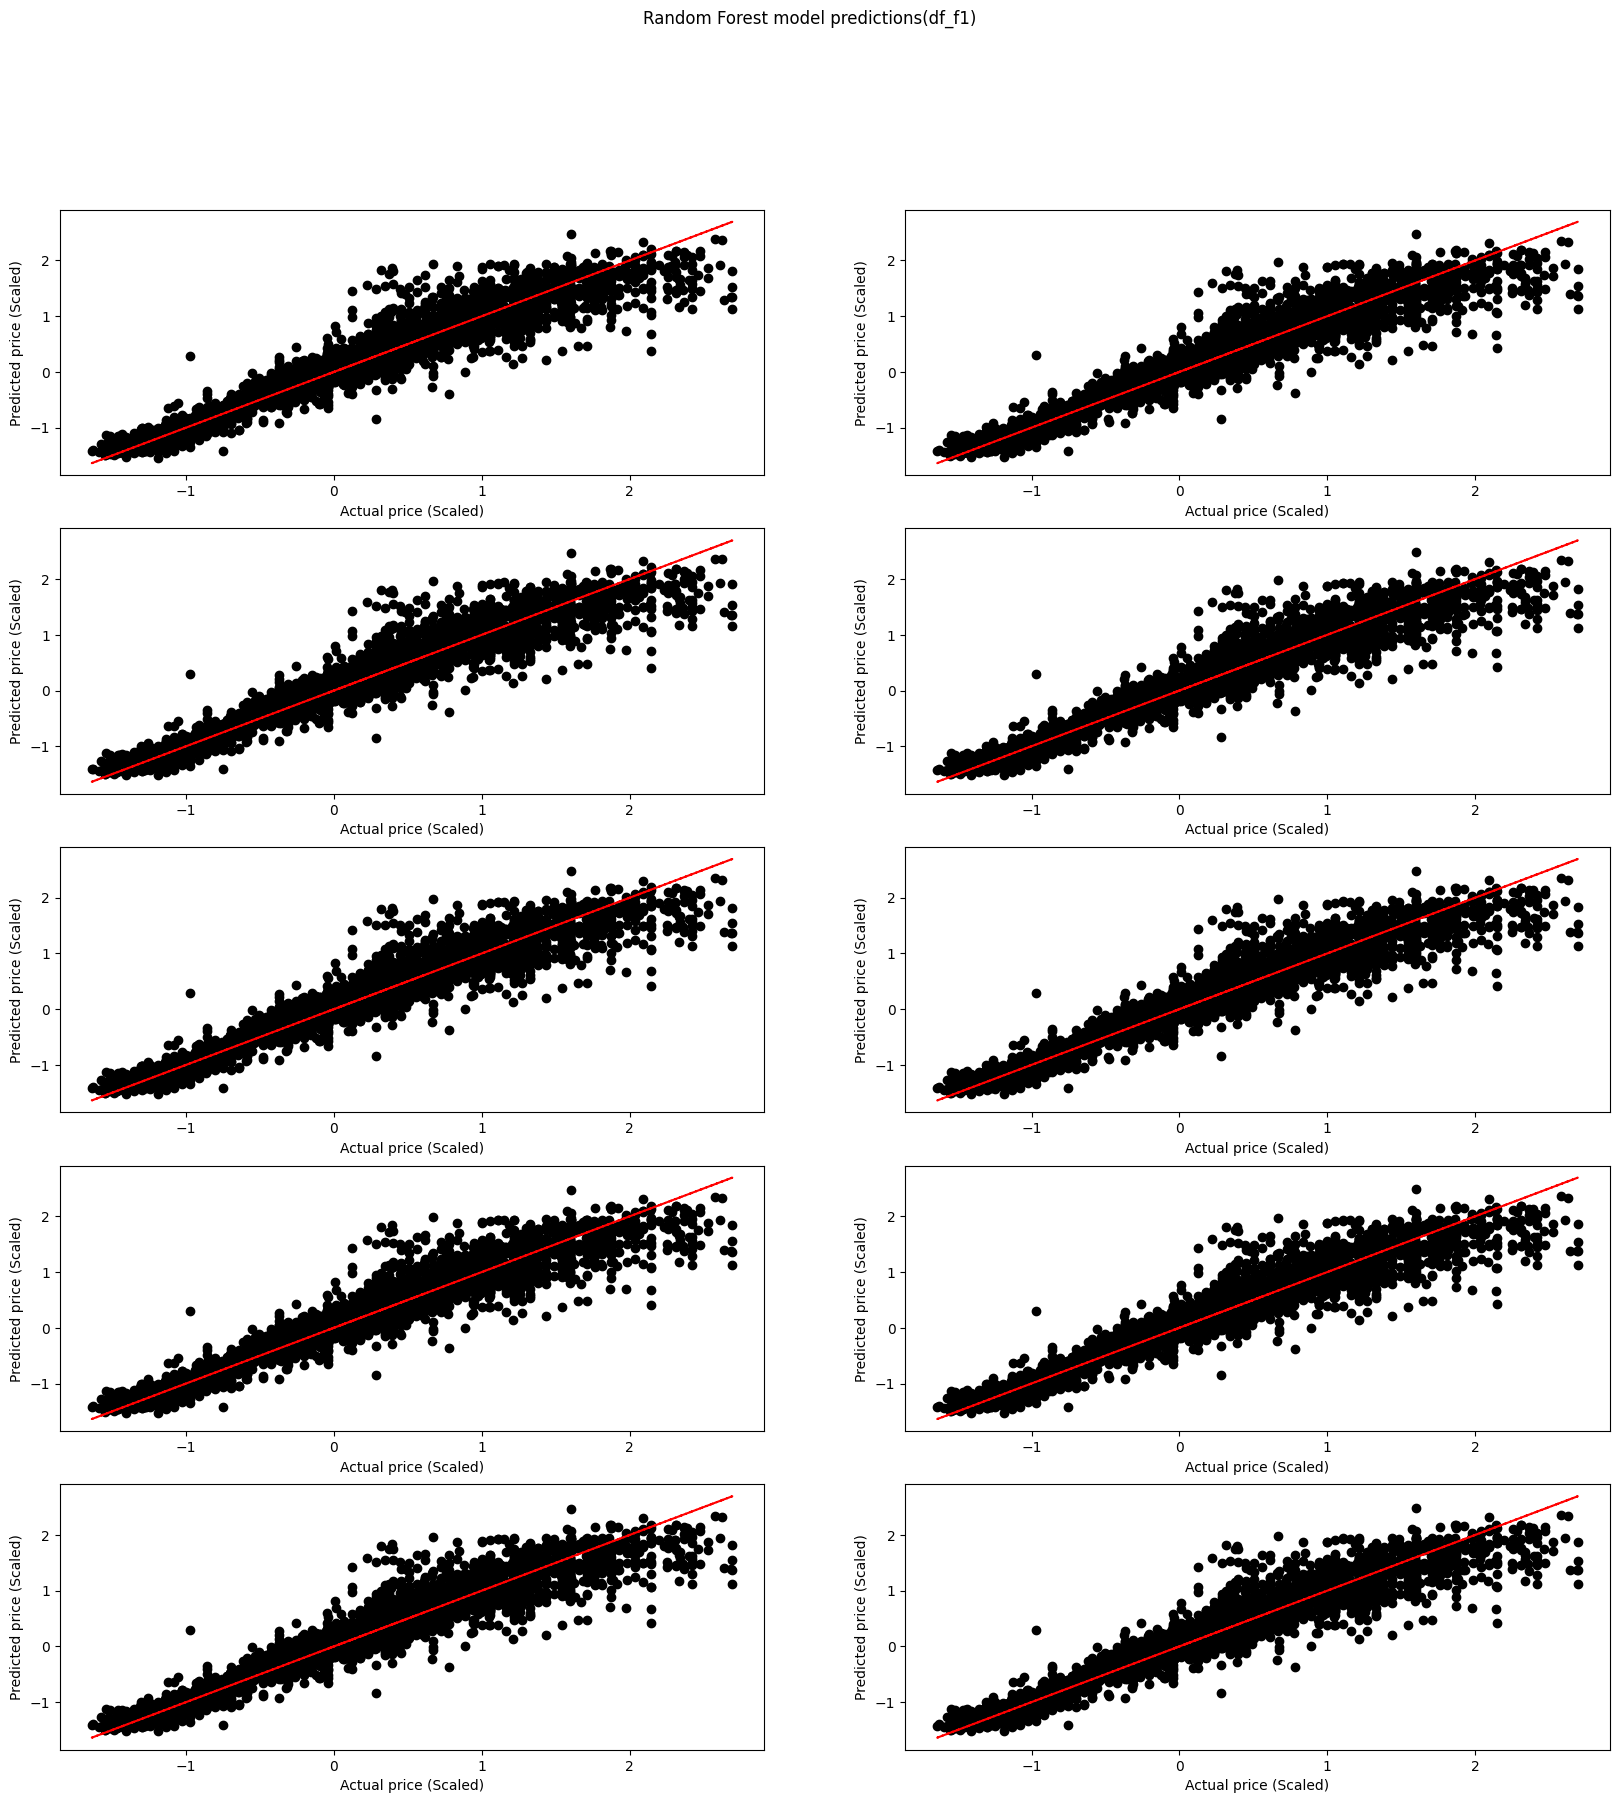

/n


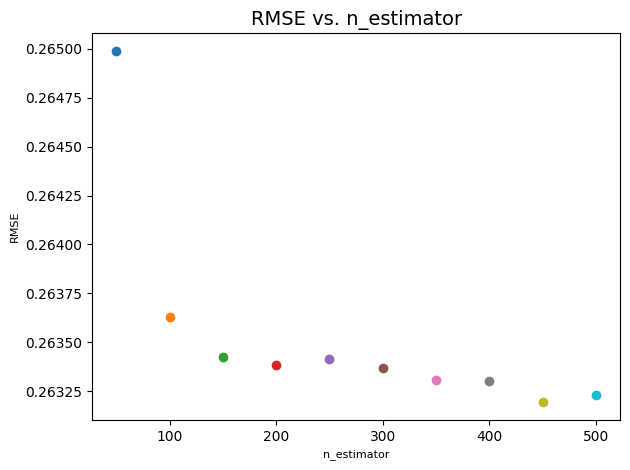

In [93]:
# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create list of different max depths and min samples split;
n_est_list = np.arange(50,550,50)

# train models and calculate RMSEs for each hidden layer size and activation function;
rmse_dict = {n_est: [] for n_est in n_est_list}

#fig, axs = plt.subplots(5, 3, figsize=(20, 20))
fig, axs = plt.subplots(5, 2, figsize=(20,20))
fig.suptitle('Random Forest model predictions(df_f1)')  

for i, n_est in enumerate(n_est_list):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=10, min_samples_split=5, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse_test = mean_squared_error(y_pred, y_test)
    rmse_test = math.sqrt(mse_test)
    rmse_dict[n_est].append(rmse_test)
        #print(f'MSE {min_ss} {max_d}: {mse_test:.3f}')
    print(f'RMSE {n_est} : {rmse_test:.3f}')
        
        # Plot the predictions against the actual values
    axs[i%5,i//5].plot(y_test, y_pred,'o', c='black')
    axs[i%5,i//5].plot(y_test, y_test, '--r') 
    axs[i%5,i//5].set_xlabel("Actual price (Scaled)")
    axs[i%5,i//5].set_ylabel("Predicted price (Scaled)")
    #axs[j,i].set_title("Neural model predictions(df_f2)")
plt.show()        
        
print("\n")     
        
# plot RMSE vs n_estimator for each activation function
for i, n_est in enumerate(n_est_list):
    plt.plot(n_est, rmse_dict[n_est], 'o')
    plt.xlabel('n_estimator', fontsize=8)
    plt.ylabel('RMSE', fontsize=8)
    plt.title(f'RMSE vs. n_estimator', fontsize=14)
    #axs[i].tick_params(axis='x', labelsize=7.5)
    #axs[i].tick_params(axis='y', labelsize=8)
    
    # add text annotations to the plot
    #for x, y in zip(n_est_list, rmse_dict[n_est]):
    #   plt.text(str(x), y, f'{y:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## ** Gradient Boosting

In [94]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train and evaluate Gradient Boosting Regressor;
gb_model = GradientBoostingRegressor(loss='squared_error', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print("Mean Squared Error:", mse_test)                                            ########### mse was not defined, i changed the variable 'mse' with 'mse_test',   checkk this..
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f2): {:.2f}".format(rmse))
print("R-suared(df_f2): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f2): {:.2f}".format(mae))

Mean Squared Error: 0.06576047270349995
Root mean squared error(df_f2): 0.26
R-suared(df_f2): 0.93
Mean absolute error(df_f2): 0.18


In [96]:
# train and evaluate XGBRegressor;
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print("Mean Squared Error:", mse_test)                                             ############# Similarly here
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error(df_f2): {:.2f}".format(rmse))
print("R-suared(df_f2): {:.2f}".format(r2_score(y_test, y_pred)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error(df_f2): {:.2f}".format(mae))

Mean Squared Error: 0.06550862501191056
Root mean squared error(df_f2): 0.26
R-suared(df_f2): 0.93
Mean absolute error(df_f2): 0.18


In [97]:
!pip install lightgbm
import lightgbm as lgb

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert data into LightGBM dataset format;
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# set hyperparameters;
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': 3,
    'min_child_weight': 0.001,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 0.01,
    'seed': 42
}

# train and evaluate LightGBM regressor;
gbm = lgb.train(params, train_data, valid_sets=[train_data, test_data], num_boost_round=100, early_stopping_rounds=10, verbose_eval=10)
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('MSE for LightGBM Regressor:', mse_test)
print('RMSE for LightGBM Regressor:', rmse_test)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 16050, number of used features: 5
[LightGBM] [Info] Start training from score -0.004030
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 0.45829	valid_1's rmse: 0.444879
[20]	training's rmse: 0.310193	valid_1's rmse: 0.297903
[30]	training's rmse: 0.277088	valid_1's rmse: 0.266331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	training's rmse: 0.268323	valid_1's rmse: 0.258936
[50]	training's rmse: 0.265415	valid_1's rmse: 0.257058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

## **Support Vector Machine (SVM)

In [98]:
from sklearn.svm import SVR

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM regressor and fit to the training data
svr = SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on the testing data and calculate the RMSE
y_pred = svr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print('MSE for SVM Regressor:', mse_test)
print('RMSE for SVM Regressor:', rmse_test)

MSE for SVM Regressor: 0.0673827147451932
RMSE for SVM Regressor: 0.2595818074233886


In [99]:
from sklearn.svm import SVR

# performs split into train/test sets;
X = df_f2[['mileage', 'year']].values
y = df_f2['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM regressor and fit to the training data
svr = SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on the testing data and calculate the RMSE
y_pred = svr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print('MSE for SVM Regressor:', mse_test)
print('RMSE for SVM Regressor:', rmse_test)

MSE for SVM Regressor: 0.08113869743712096
RMSE for SVM Regressor: 0.2848485517553511


#                                       **NEURAL NETWORK**

MSE relu (100,): 0.067
RMSE relu (100,): 0.258
MSE relu (100, 100): 0.065
RMSE relu (100, 100): 0.255
MSE relu (100, 100, 100): 0.064
RMSE relu (100, 100, 100): 0.254
MSE relu (100, 100, 100, 100): 0.065
RMSE relu (100, 100, 100, 100): 0.255
MSE relu (100, 100, 100, 100, 100): 0.065
RMSE relu (100, 100, 100, 100, 100): 0.255
MSE logistic (100,): 0.072
RMSE logistic (100,): 0.269
MSE logistic (100, 100): 0.068
RMSE logistic (100, 100): 0.260
MSE logistic (100, 100, 100): 0.086
RMSE logistic (100, 100, 100): 0.294
MSE logistic (100, 100, 100, 100): 0.079
RMSE logistic (100, 100, 100, 100): 0.281
MSE logistic (100, 100, 100, 100, 100): 0.076
RMSE logistic (100, 100, 100, 100, 100): 0.275
MSE tanh (100,): 0.072
RMSE tanh (100,): 0.268
MSE tanh (100, 100): 0.066
RMSE tanh (100, 100): 0.256
MSE tanh (100, 100, 100): 0.066
RMSE tanh (100, 100, 100): 0.258
MSE tanh (100, 100, 100, 100): 0.067
RMSE tanh (100, 100, 100, 100): 0.258
MSE tanh (100, 100, 100, 100, 100): 0.068
RMSE tanh (100, 100, 1

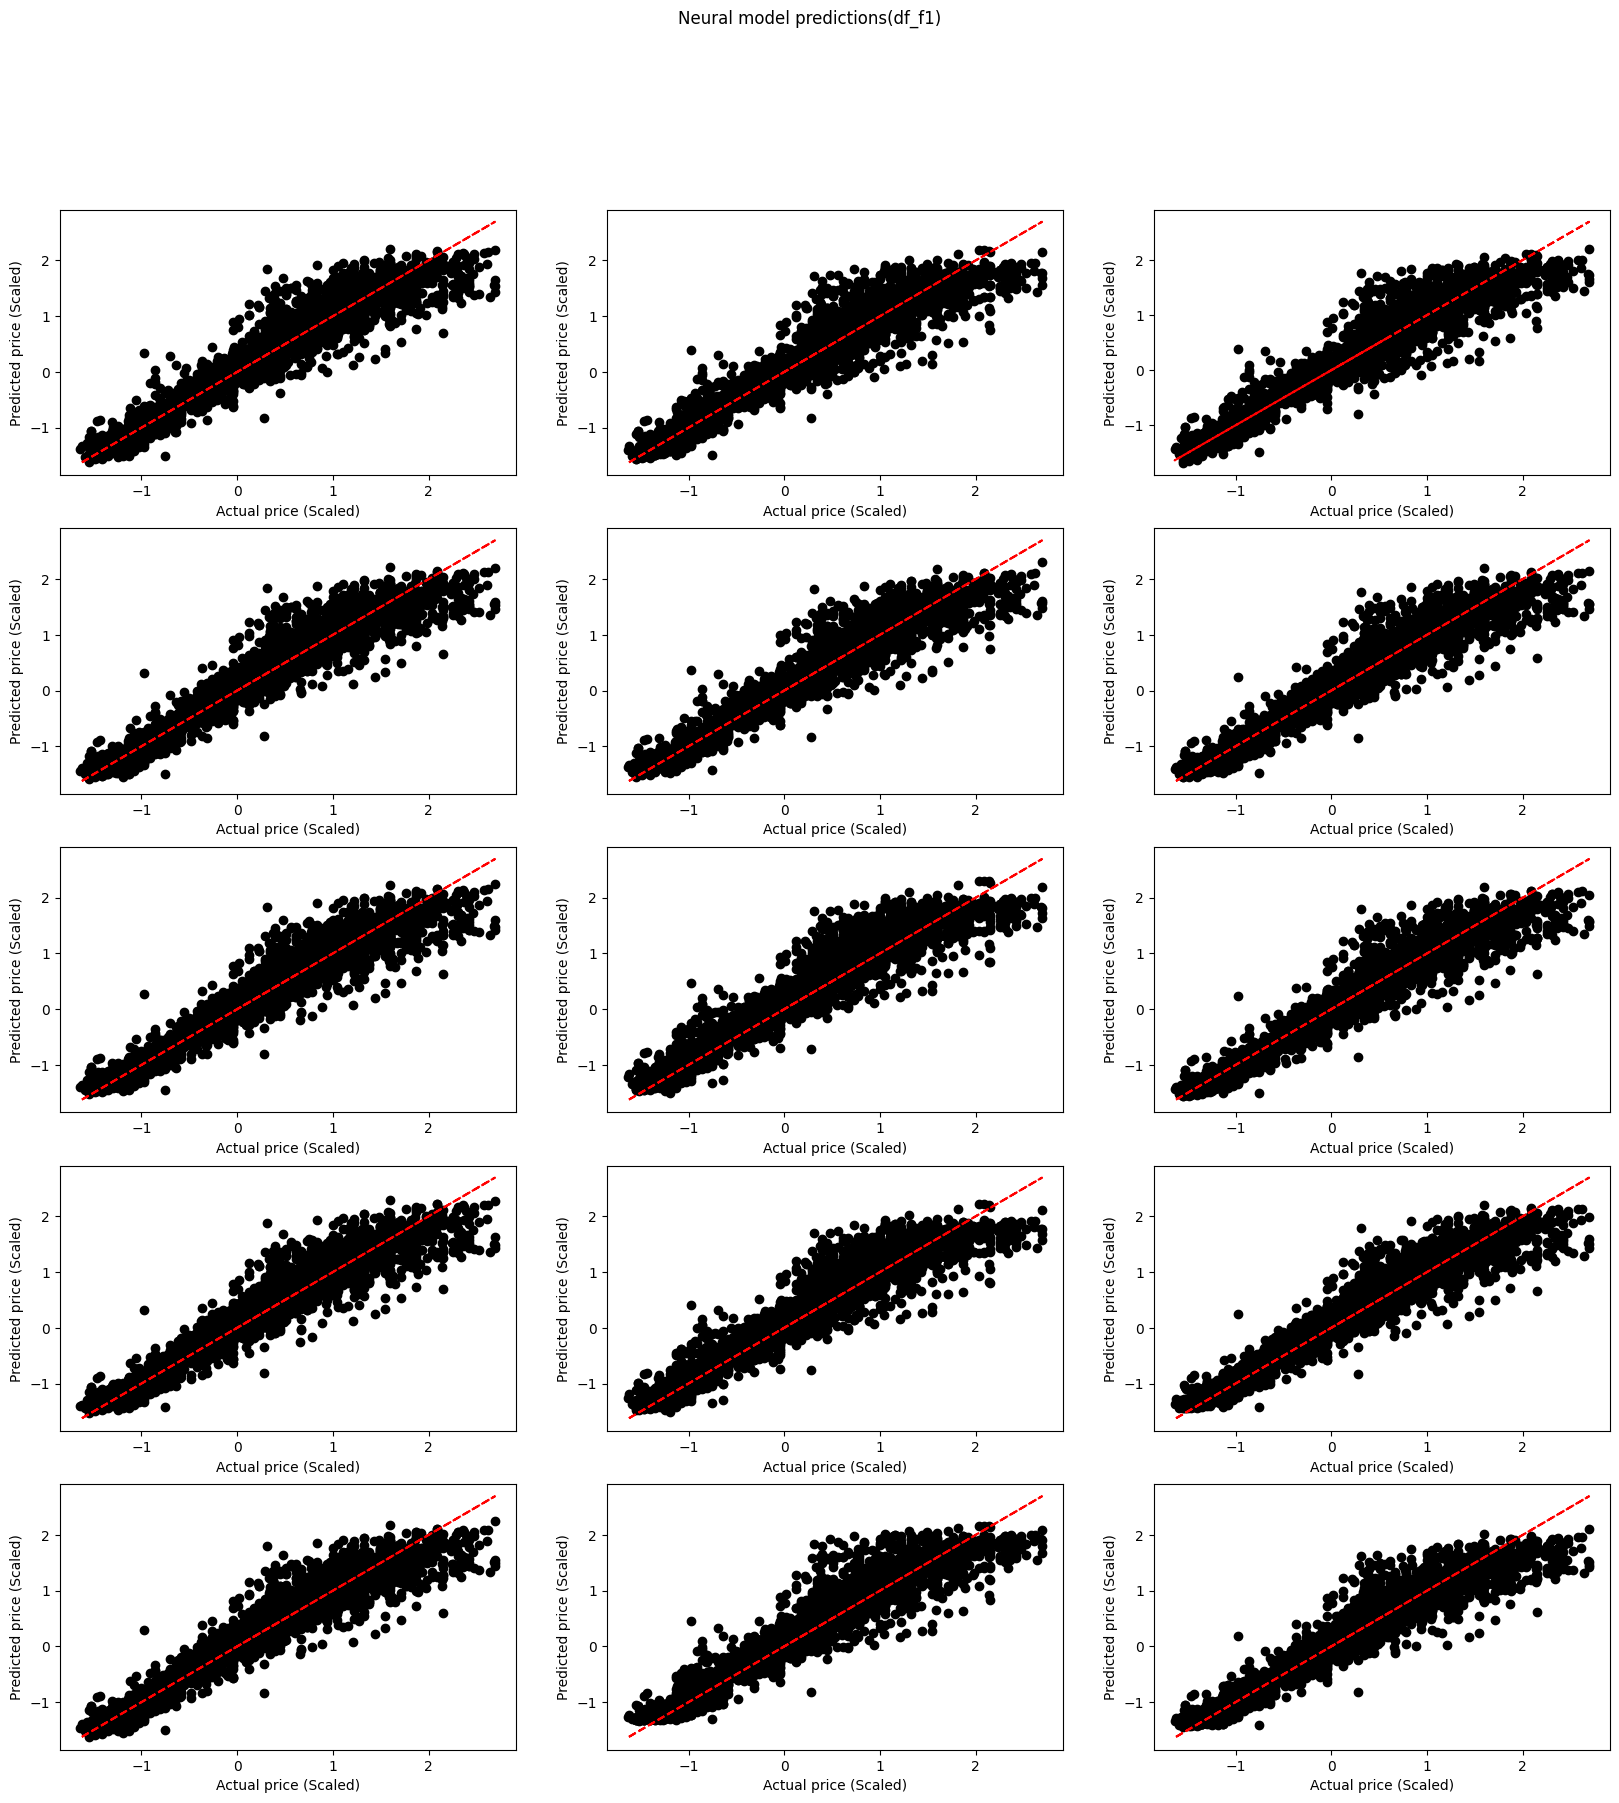

/n


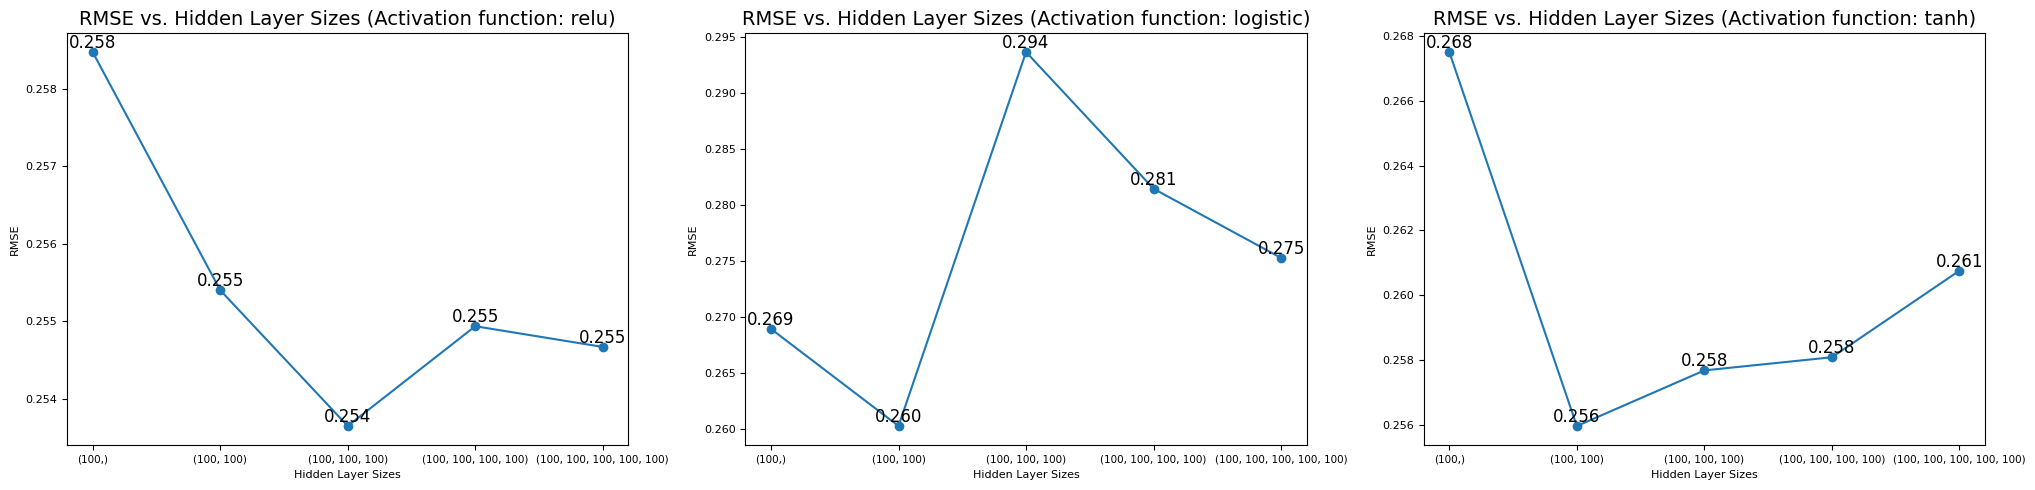

In [100]:
#### Neural Network model for dataframe df_f1;
from sklearn.neural_network import MLPRegressor
import math

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values  ## good practice to keep X and y in numpy array;
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create list of different hidden layer sizes and activation function;
hidden_layer_sizes_list = [(100,), (100, 100), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)]
activation_function_list = ['relu', 'logistic', 'tanh']

# train models and calculate RMSEs for each hidden layer size and activation function;
rmse_dict = {activation: [] for activation in activation_function_list}

#fig, axs = plt.subplots(5, 3, figsize=(20, 20))
fig, axs = plt.subplots(nrows=len(hidden_layer_sizes_list), ncols=len(activation_function_list), figsize=(20,20))
fig.suptitle('Neural model predictions(df_f1)')  

for i, activation in enumerate(activation_function_list):
    for j, hidden_layer_sizes in enumerate(hidden_layer_sizes_list):
        nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver='adam', max_iter=1000, random_state=42) ## at max_iter= 200 not converging, tested at 300.. we can check at where it actually converges;
        nn_model.fit(X_train, y_train)
        nn_model.fit(X_train, y_train)
        y_pred = nn_model.predict(X_test)
        mse_test = mean_squared_error(y_pred, y_test)
        rmse_test = math.sqrt(mse_test)
        rmse_dict[activation].append(rmse_test)
        print(f'MSE {activation} {hidden_layer_sizes}: {mse_test:.3f}')
        print(f'RMSE {activation} {hidden_layer_sizes}: {rmse_test:.3f}')
        
        # Plot the predictions against the actual values
        axs[j,i].plot(y_test, y_pred,'o', c='black')
        axs[j,i].plot(y_test, y_test, '--r') 
        axs[j,i].set_xlabel("Actual price (Scaled)")
        axs[j,i].set_ylabel("Predicted price (Scaled)")
        #axs[j,i].set_title("Neural model predictions(df_f2)")
plt.show()   

print("\n")  

# plot RMSE vs hidden layer sizes for each activation function;
fig, axs = plt.subplots(1, 3, figsize=(20.5, 5))

for i, activation in enumerate(activation_function_list):
    axs[i].plot([str(x) for x in hidden_layer_sizes_list], rmse_dict[activation], '-o')
    axs[i].set_xlabel('Hidden Layer Sizes', fontsize=8)
    axs[i].set_ylabel('RMSE', fontsize=8)
    axs[i].set_title(f'RMSE vs. Hidden Layer Sizes (Activation function: {activation})', fontsize=14)
    axs[i].tick_params(axis='x', labelsize=7.5)
    axs[i].tick_params(axis='y', labelsize=8)
    
    # add text annotations to the plot
    for x, y in zip(hidden_layer_sizes_list, rmse_dict[activation]):
        axs[i].text(str(x), y, f'{y:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


MSE relu (100,): 0.079
RMSE relu (100,): 0.280
MSE relu (100, 100): 0.078
RMSE relu (100, 100): 0.279
MSE relu (100, 100, 100): 0.078
RMSE relu (100, 100, 100): 0.279
MSE relu (100, 100, 100, 100): 0.078
RMSE relu (100, 100, 100, 100): 0.280
MSE relu (100, 100, 100, 100, 100): 0.078
RMSE relu (100, 100, 100, 100, 100): 0.279
MSE logistic (100,): 0.091
RMSE logistic (100,): 0.301
MSE logistic (100, 100): 0.079
RMSE logistic (100, 100): 0.281
MSE logistic (100, 100, 100): 0.092
RMSE logistic (100, 100, 100): 0.303
MSE logistic (100, 100, 100, 100): 0.092
RMSE logistic (100, 100, 100, 100): 0.303
MSE logistic (100, 100, 100, 100, 100): 0.086
RMSE logistic (100, 100, 100, 100, 100): 0.293
MSE tanh (100,): 0.086
RMSE tanh (100,): 0.294
MSE tanh (100, 100): 0.078
RMSE tanh (100, 100): 0.280
MSE tanh (100, 100, 100): 0.080
RMSE tanh (100, 100, 100): 0.284
MSE tanh (100, 100, 100, 100): 0.078
RMSE tanh (100, 100, 100, 100): 0.280
MSE tanh (100, 100, 100, 100, 100): 0.079
RMSE tanh (100, 100, 1

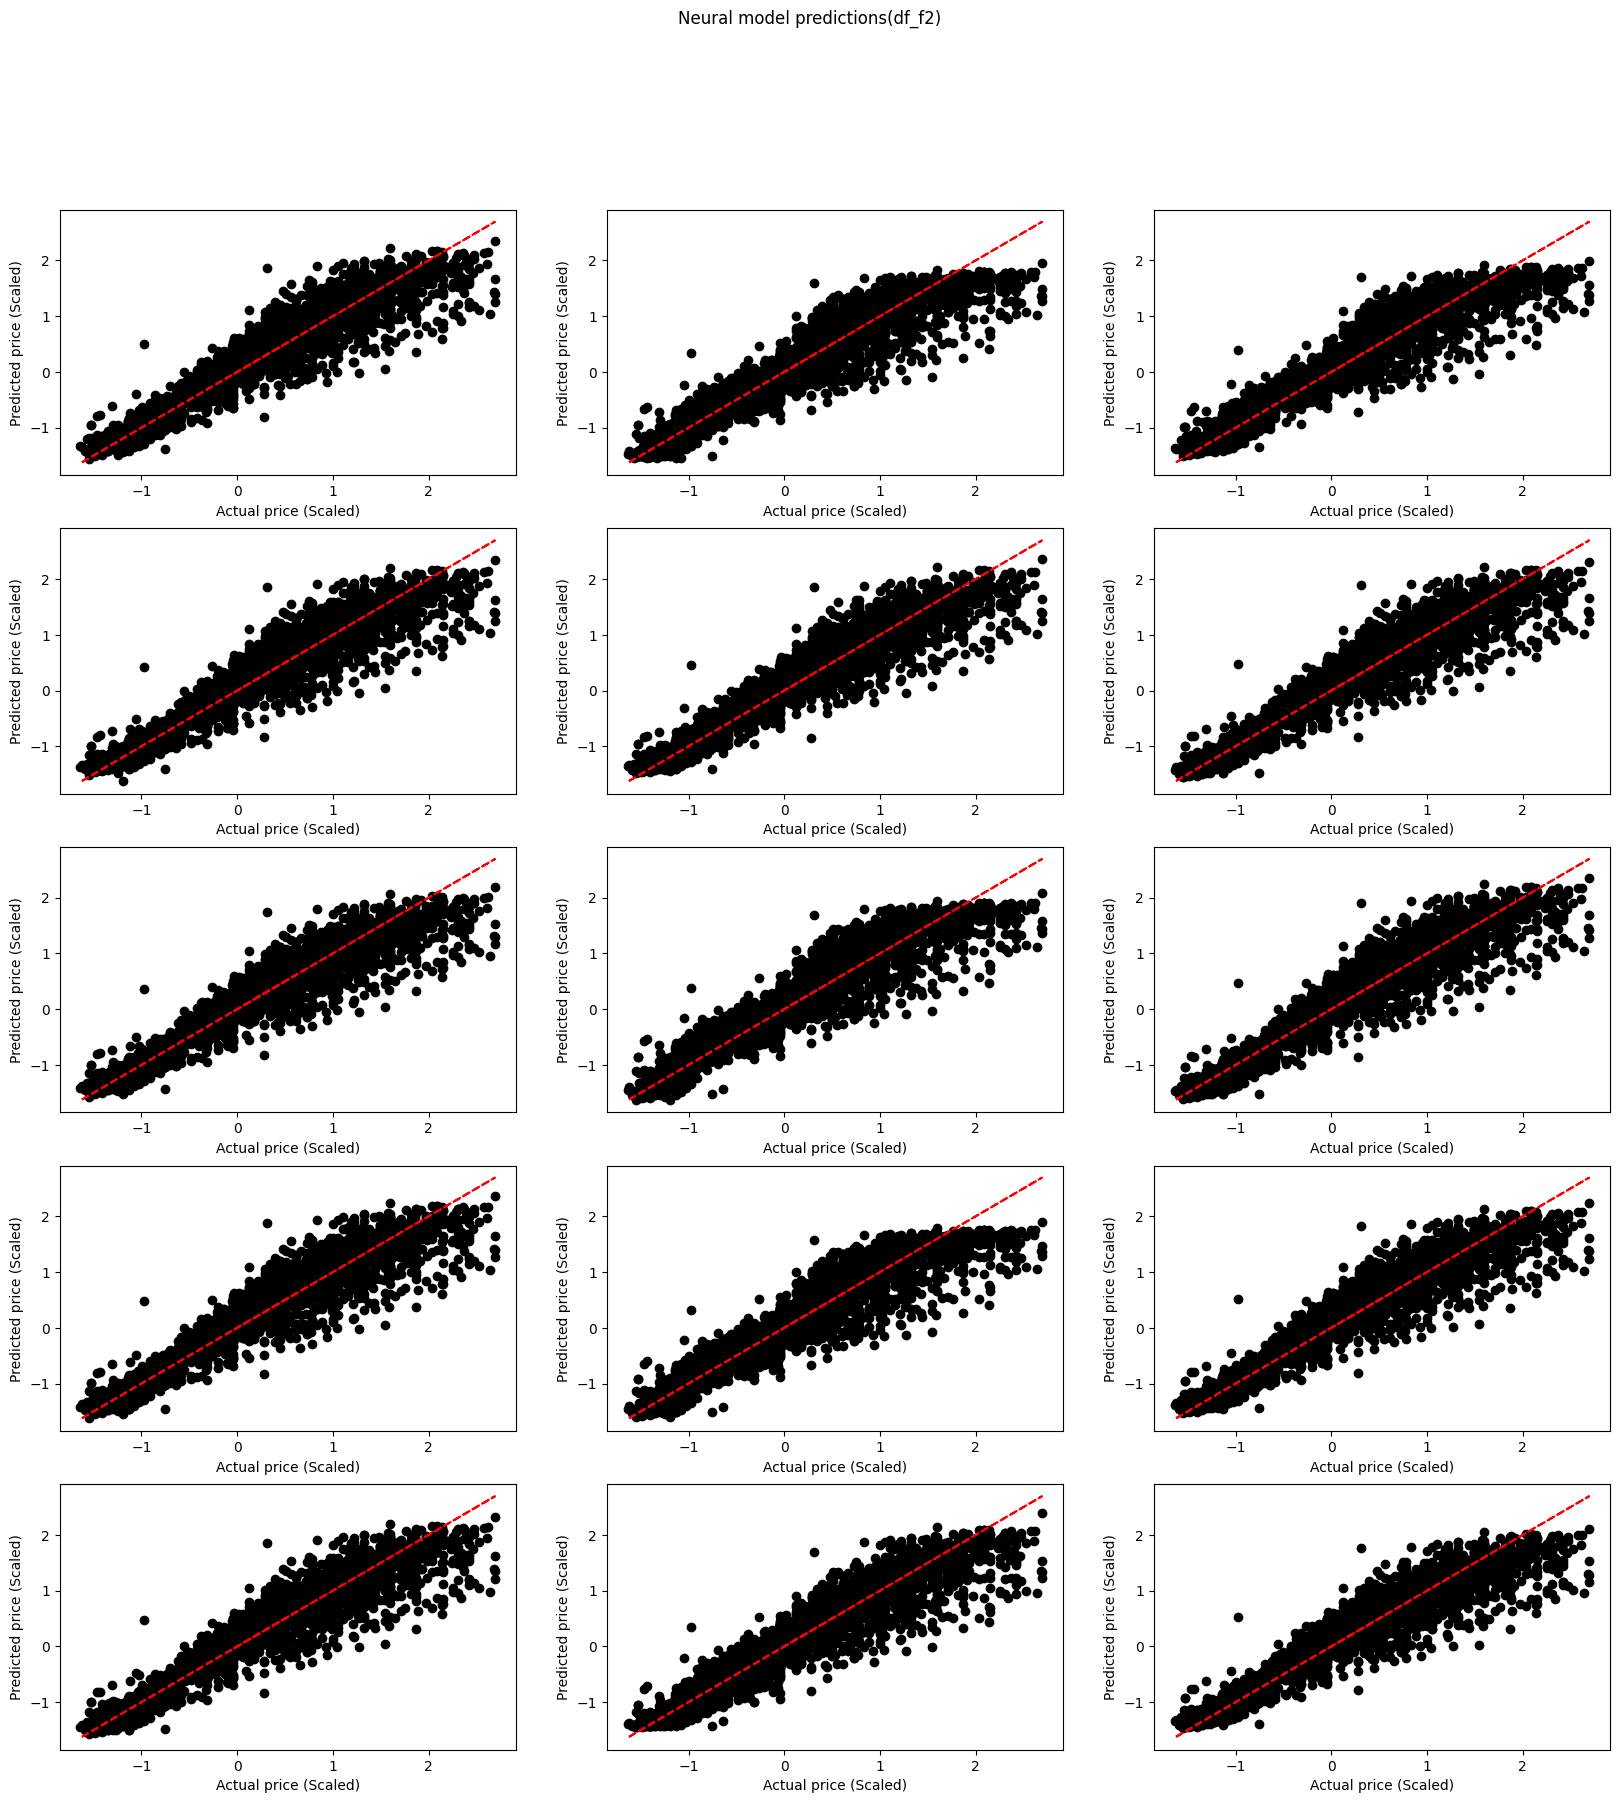

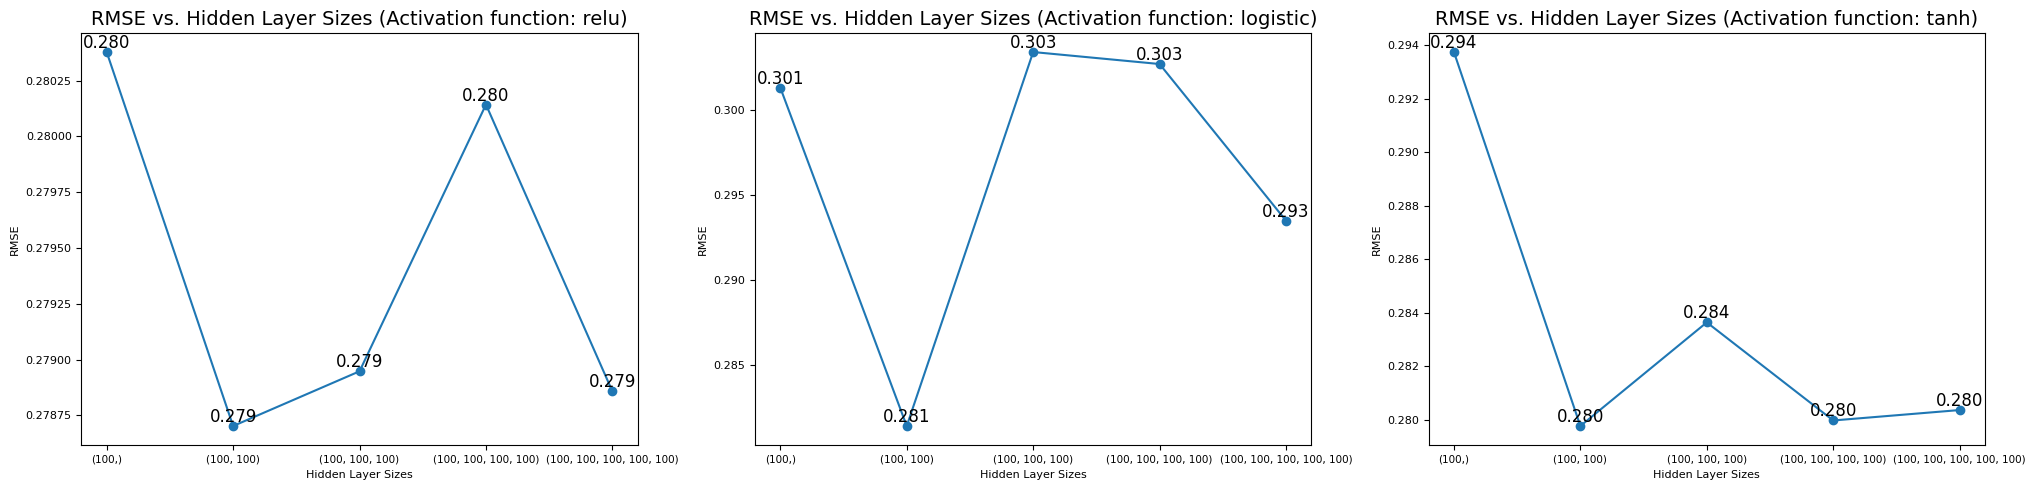

In [103]:
#### Neural Network model for dataframe df_f2;
from sklearn.neural_network import MLPRegressor
import math

# performs split into train/test sets;
X = df_f1[['mileage', 'year']].values  ## good practice to keep X and y in numpy array;
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create list of different hidden layer sizes and activation function;
hidden_layer_sizes_list = [(100,), (100, 100), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)]
activation_function_list = ['relu', 'logistic', 'tanh']

# train models and calculate RMSEs for each hidden layer size and activation function;
rmse_dict = {activation: [] for activation in activation_function_list}

#fig, axs = plt.subplots(5, 3, figsize=(20, 20))
fig, axs = plt.subplots(nrows=len(hidden_layer_sizes_list), ncols=len(activation_function_list), figsize=(20,20))
fig.suptitle('Neural model predictions(df_f2)')  

for i, activation in enumerate(activation_function_list):
    for j, hidden_layer_sizes in enumerate(hidden_layer_sizes_list):
        nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver='adam', max_iter=1000, random_state=42) ## at max_iter= 200 not converging, tested at 300.. we can check at where it actually converges;
        nn_model.fit(X_train, y_train)
        nn_model.fit(X_train, y_train)
        y_pred = nn_model.predict(X_test)
        mse_test = mean_squared_error(y_pred, y_test)
        rmse_test = math.sqrt(mse_test)
        rmse_dict[activation].append(rmse_test)
        print(f'MSE {activation} {hidden_layer_sizes}: {mse_test:.3f}')
        print(f'RMSE {activation} {hidden_layer_sizes}: {rmse_test:.3f}')
        
        # Plot the predictions against the actual values
        axs[j,i].plot(y_test, y_pred,'o', c='black')
        axs[j,i].plot(y_test, y_test, '--r') 
        axs[j,i].set_xlabel("Actual price (Scaled)")
        axs[j,i].set_ylabel("Predicted price (Scaled)")
        #axs[j,i].set_title("Neural model predictions(df_f2)")
plt.show()        
        
print("\n")      
        
# plot RMSE vs hidden layer sizes for each activation function;
fig, axs = plt.subplots(1, 3, figsize=(20.5, 5))

for i, activation in enumerate(activation_function_list):
    axs[i].plot([str(x) for x in hidden_layer_sizes_list], rmse_dict[activation], '-o')
    axs[i].set_xlabel('Hidden Layer Sizes', fontsize=8)
    axs[i].set_ylabel('RMSE', fontsize=8)
    axs[i].set_title(f'RMSE vs. Hidden Layer Sizes (Activation function: {activation})', fontsize=14)
    axs[i].tick_params(axis='x', labelsize=7.5)
    axs[i].tick_params(axis='y', labelsize=8)
    
    # add text annotations to the plot
    for x, y in zip(hidden_layer_sizes_list, rmse_dict[activation]):
        axs[i].text(str(x), y, f'{y:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


MSE relu (10,): 0.072
RMSE relu (10,): 0.268
MSE relu (10, 10): 0.069
RMSE relu (10, 10): 0.262
MSE relu (10, 10, 10): 0.069
RMSE relu (10, 10, 10): 0.262
MSE relu (10, 10, 10, 10): 0.065
RMSE relu (10, 10, 10, 10): 0.256
MSE relu (10, 10, 10, 10, 10): 0.066
RMSE relu (10, 10, 10, 10, 10): 0.256
MSE logistic (10,): 0.074
RMSE logistic (10,): 0.273
MSE logistic (10, 10): 0.074
RMSE logistic (10, 10): 0.272
MSE logistic (10, 10, 10): 0.074
RMSE logistic (10, 10, 10): 0.271
MSE logistic (10, 10, 10, 10): 0.074
RMSE logistic (10, 10, 10, 10): 0.272
MSE logistic (10, 10, 10, 10, 10): 0.072
RMSE logistic (10, 10, 10, 10, 10): 0.268
MSE tanh (10,): 0.071
RMSE tanh (10,): 0.266
MSE tanh (10, 10): 0.072
RMSE tanh (10, 10): 0.268
MSE tanh (10, 10, 10): 0.069
RMSE tanh (10, 10, 10): 0.263
MSE tanh (10, 10, 10, 10): 0.065
RMSE tanh (10, 10, 10, 10): 0.256
MSE tanh (10, 10, 10, 10, 10): 0.066
RMSE tanh (10, 10, 10, 10, 10): 0.257


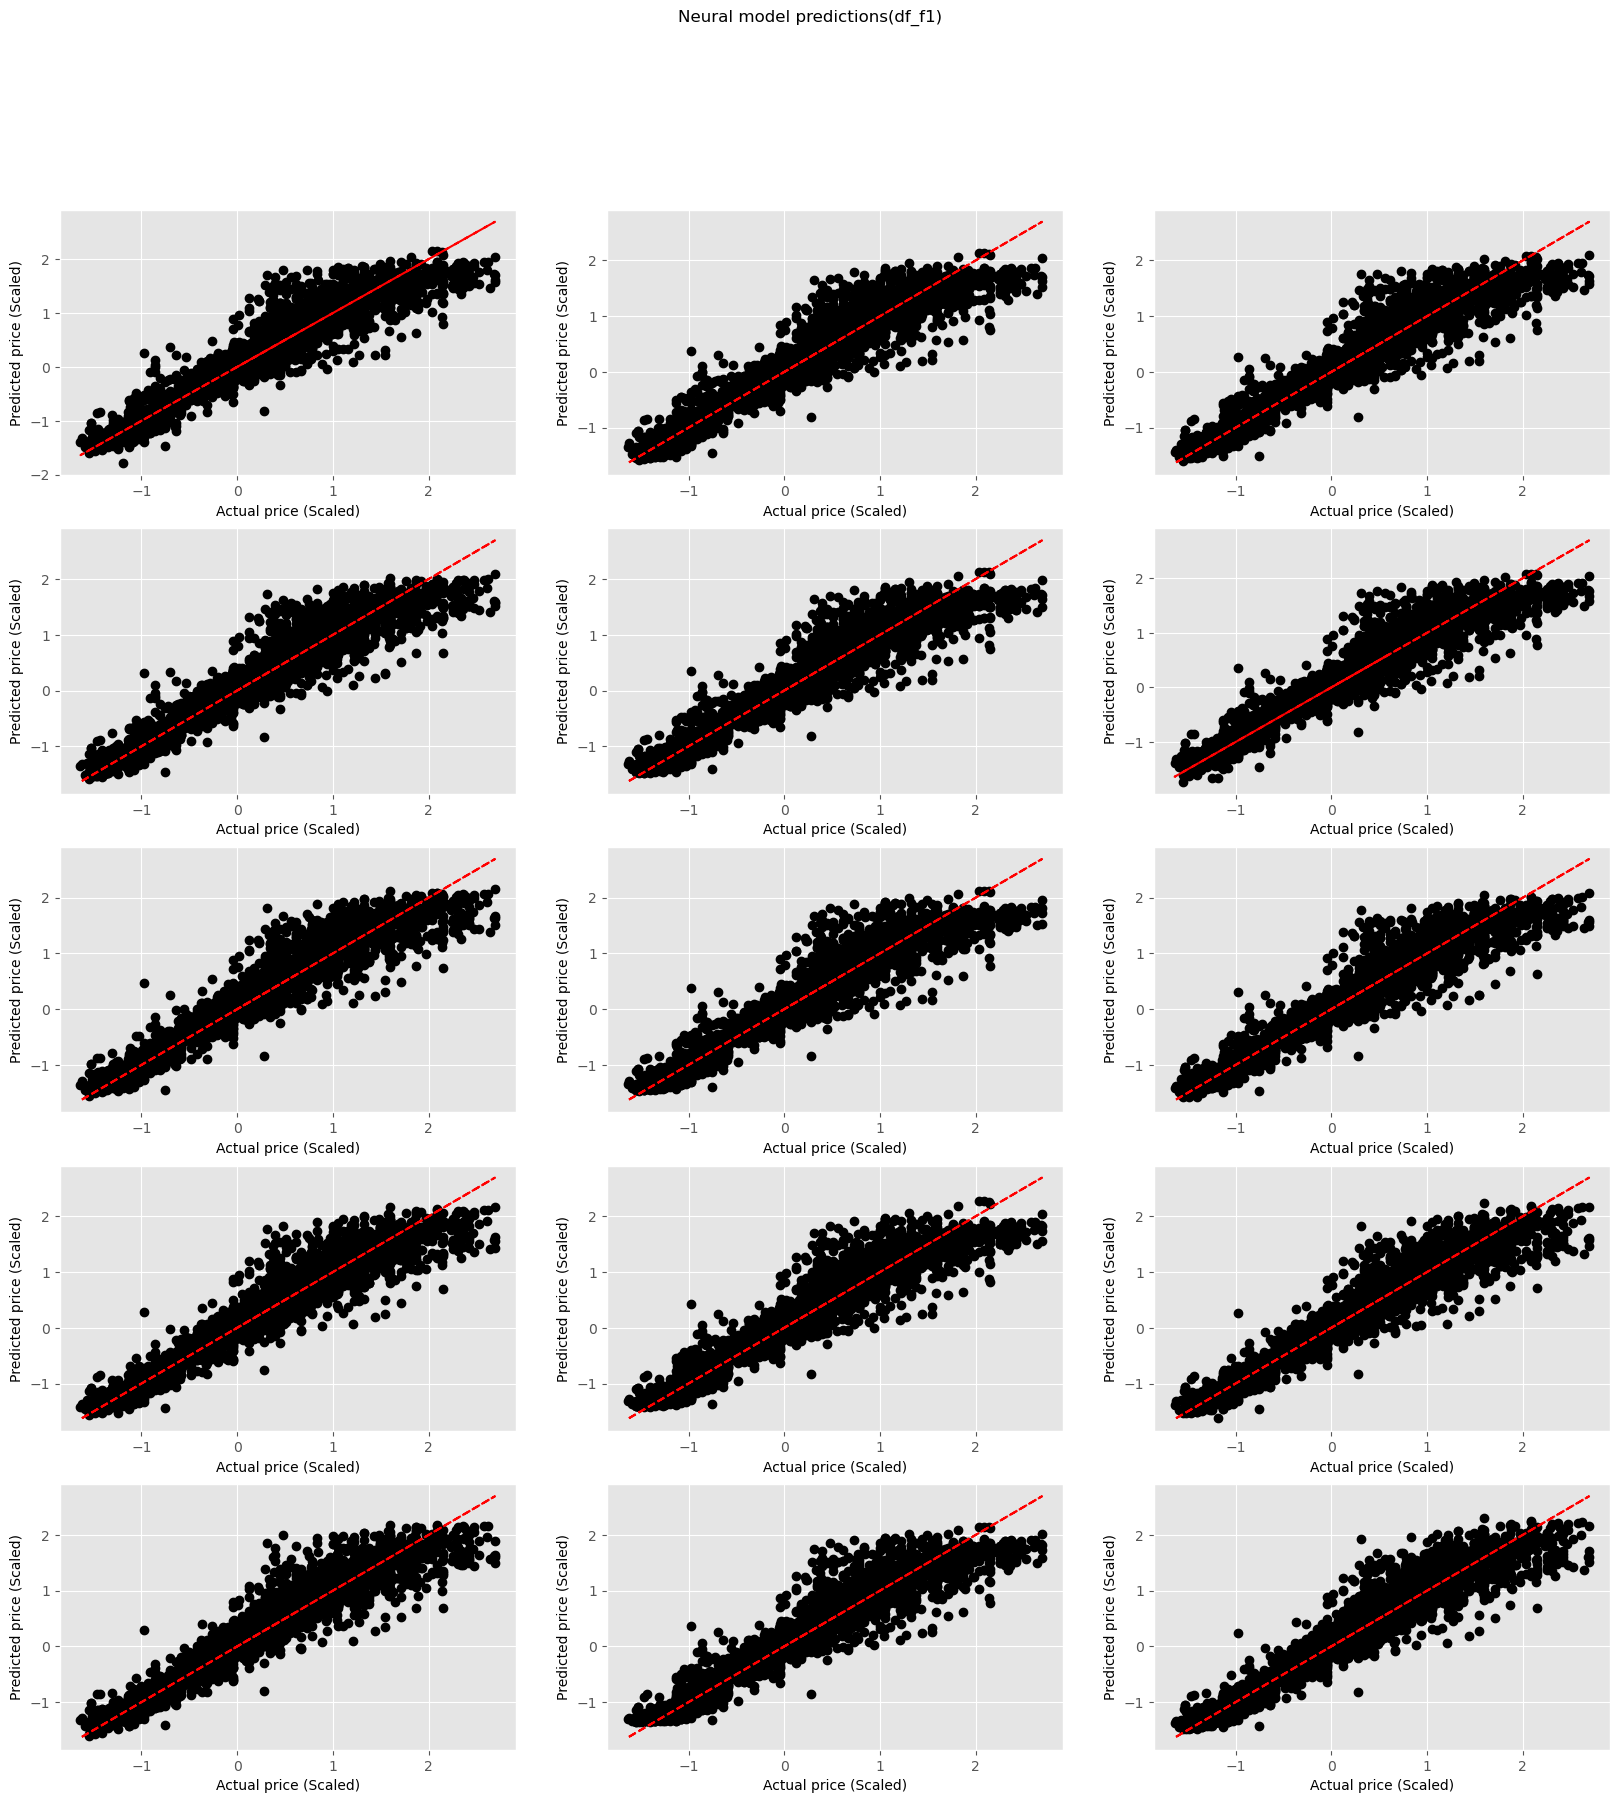

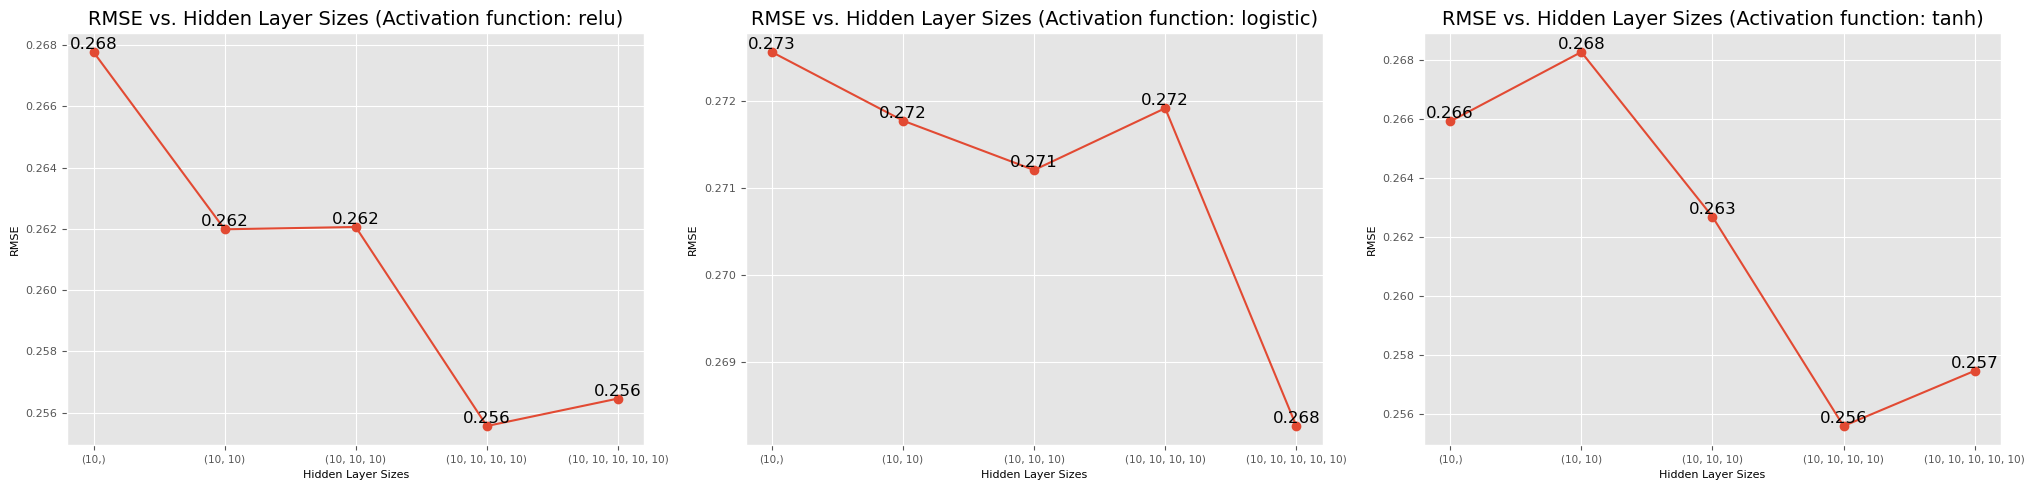

In [ ]:
#### Neural Network model for dataframe df_f1;
from sklearn.neural_network import MLPRegressor
import math

# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values  ## good practice to keep X and y in numpy array;
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create list of different hidden layer sizes and activation function;
hidden_layer_sizes_list = [(10,), (10, 10), (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)]
activation_function_list = ['relu', 'logistic', 'tanh']

# train models and calculate RMSEs for each hidden layer size and activation function;
rmse_dict = {activation: [] for activation in activation_function_list}

#fig, axs = plt.subplots(5, 3, figsize=(20, 20))
fig, axs = plt.subplots(nrows=len(hidden_layer_sizes_list), ncols=len(activation_function_list), figsize=(20,20))
fig.suptitle('Neural model predictions(df_f1)')  

for i, activation in enumerate(activation_function_list):
    for j, hidden_layer_sizes in enumerate(hidden_layer_sizes_list):
        nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver='adam', max_iter=1000, random_state=42) ## at max_iter= 200 not converging, tested at 300.. we can check at where it actually converges;
        nn_model.fit(X_train, y_train)
        nn_model.fit(X_train, y_train)
        y_pred = nn_model.predict(X_test)
        mse_test = mean_squared_error(y_pred, y_test)
        rmse_test = math.sqrt(mse_test)
        rmse_dict[activation].append(rmse_test)
        print(f'MSE {activation} {hidden_layer_sizes}: {mse_test:.3f}')
        print(f'RMSE {activation} {hidden_layer_sizes}: {rmse_test:.3f}')
        
        # Plot the predictions against the actual values
        axs[j,i].plot(y_test, y_pred,'o', c='black')
        axs[j,i].plot(y_test, y_test, '--r') 
        axs[j,i].set_xlabel("Actual price (Scaled)")
        axs[j,i].set_ylabel("Predicted price (Scaled)")
        #axs[j,i].set_title("Neural model predictions(df_f2)")
plt.show()        
        
print("\n")      
        
# plot RMSE vs hidden layer sizes for each activation function;
fig, axs = plt.subplots(1, 3, figsize=(20.5, 5))

for i, activation in enumerate(activation_function_list):
    axs[i].plot([str(x) for x in hidden_layer_sizes_list], rmse_dict[activation], '-o')
    axs[i].set_xlabel('Hidden Layer Sizes', fontsize=8)
    axs[i].set_ylabel('RMSE', fontsize=8)
    axs[i].set_title(f'RMSE vs. Hidden Layer Sizes (Activation function: {activation})', fontsize=14)
    axs[i].tick_params(axis='x', labelsize=7.5)
    axs[i].tick_params(axis='y', labelsize=8)
    
    # add text annotations to the plot
    for x, y in zip(hidden_layer_sizes_list, rmse_dict[activation]):
        axs[i].text(str(x), y, f'{y:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


MSE relu (10,): 0.081
RMSE relu (10,): 0.285
MSE relu (10, 10): 0.079
RMSE relu (10, 10): 0.282
MSE relu (10, 10, 10): 0.078
RMSE relu (10, 10, 10): 0.280
MSE relu (10, 10, 10, 10): 0.078
RMSE relu (10, 10, 10, 10): 0.280
MSE relu (10, 10, 10, 10, 10): 0.078
RMSE relu (10, 10, 10, 10, 10): 0.279
MSE logistic (10,): 0.090
RMSE logistic (10,): 0.301
MSE logistic (10, 10): 0.091
RMSE logistic (10, 10): 0.301
MSE logistic (10, 10, 10): 0.090
RMSE logistic (10, 10, 10): 0.300
MSE logistic (10, 10, 10, 10): 0.090
RMSE logistic (10, 10, 10, 10): 0.299
MSE logistic (10, 10, 10, 10, 10): 0.087
RMSE logistic (10, 10, 10, 10, 10): 0.295
MSE tanh (10,): 0.084
RMSE tanh (10,): 0.291
MSE tanh (10, 10): 0.080
RMSE tanh (10, 10): 0.284
MSE tanh (10, 10, 10): 0.077
RMSE tanh (10, 10, 10): 0.278
MSE tanh (10, 10, 10, 10): 0.081
RMSE tanh (10, 10, 10, 10): 0.284
MSE tanh (10, 10, 10, 10, 10): 0.079
RMSE tanh (10, 10, 10, 10, 10): 0.281


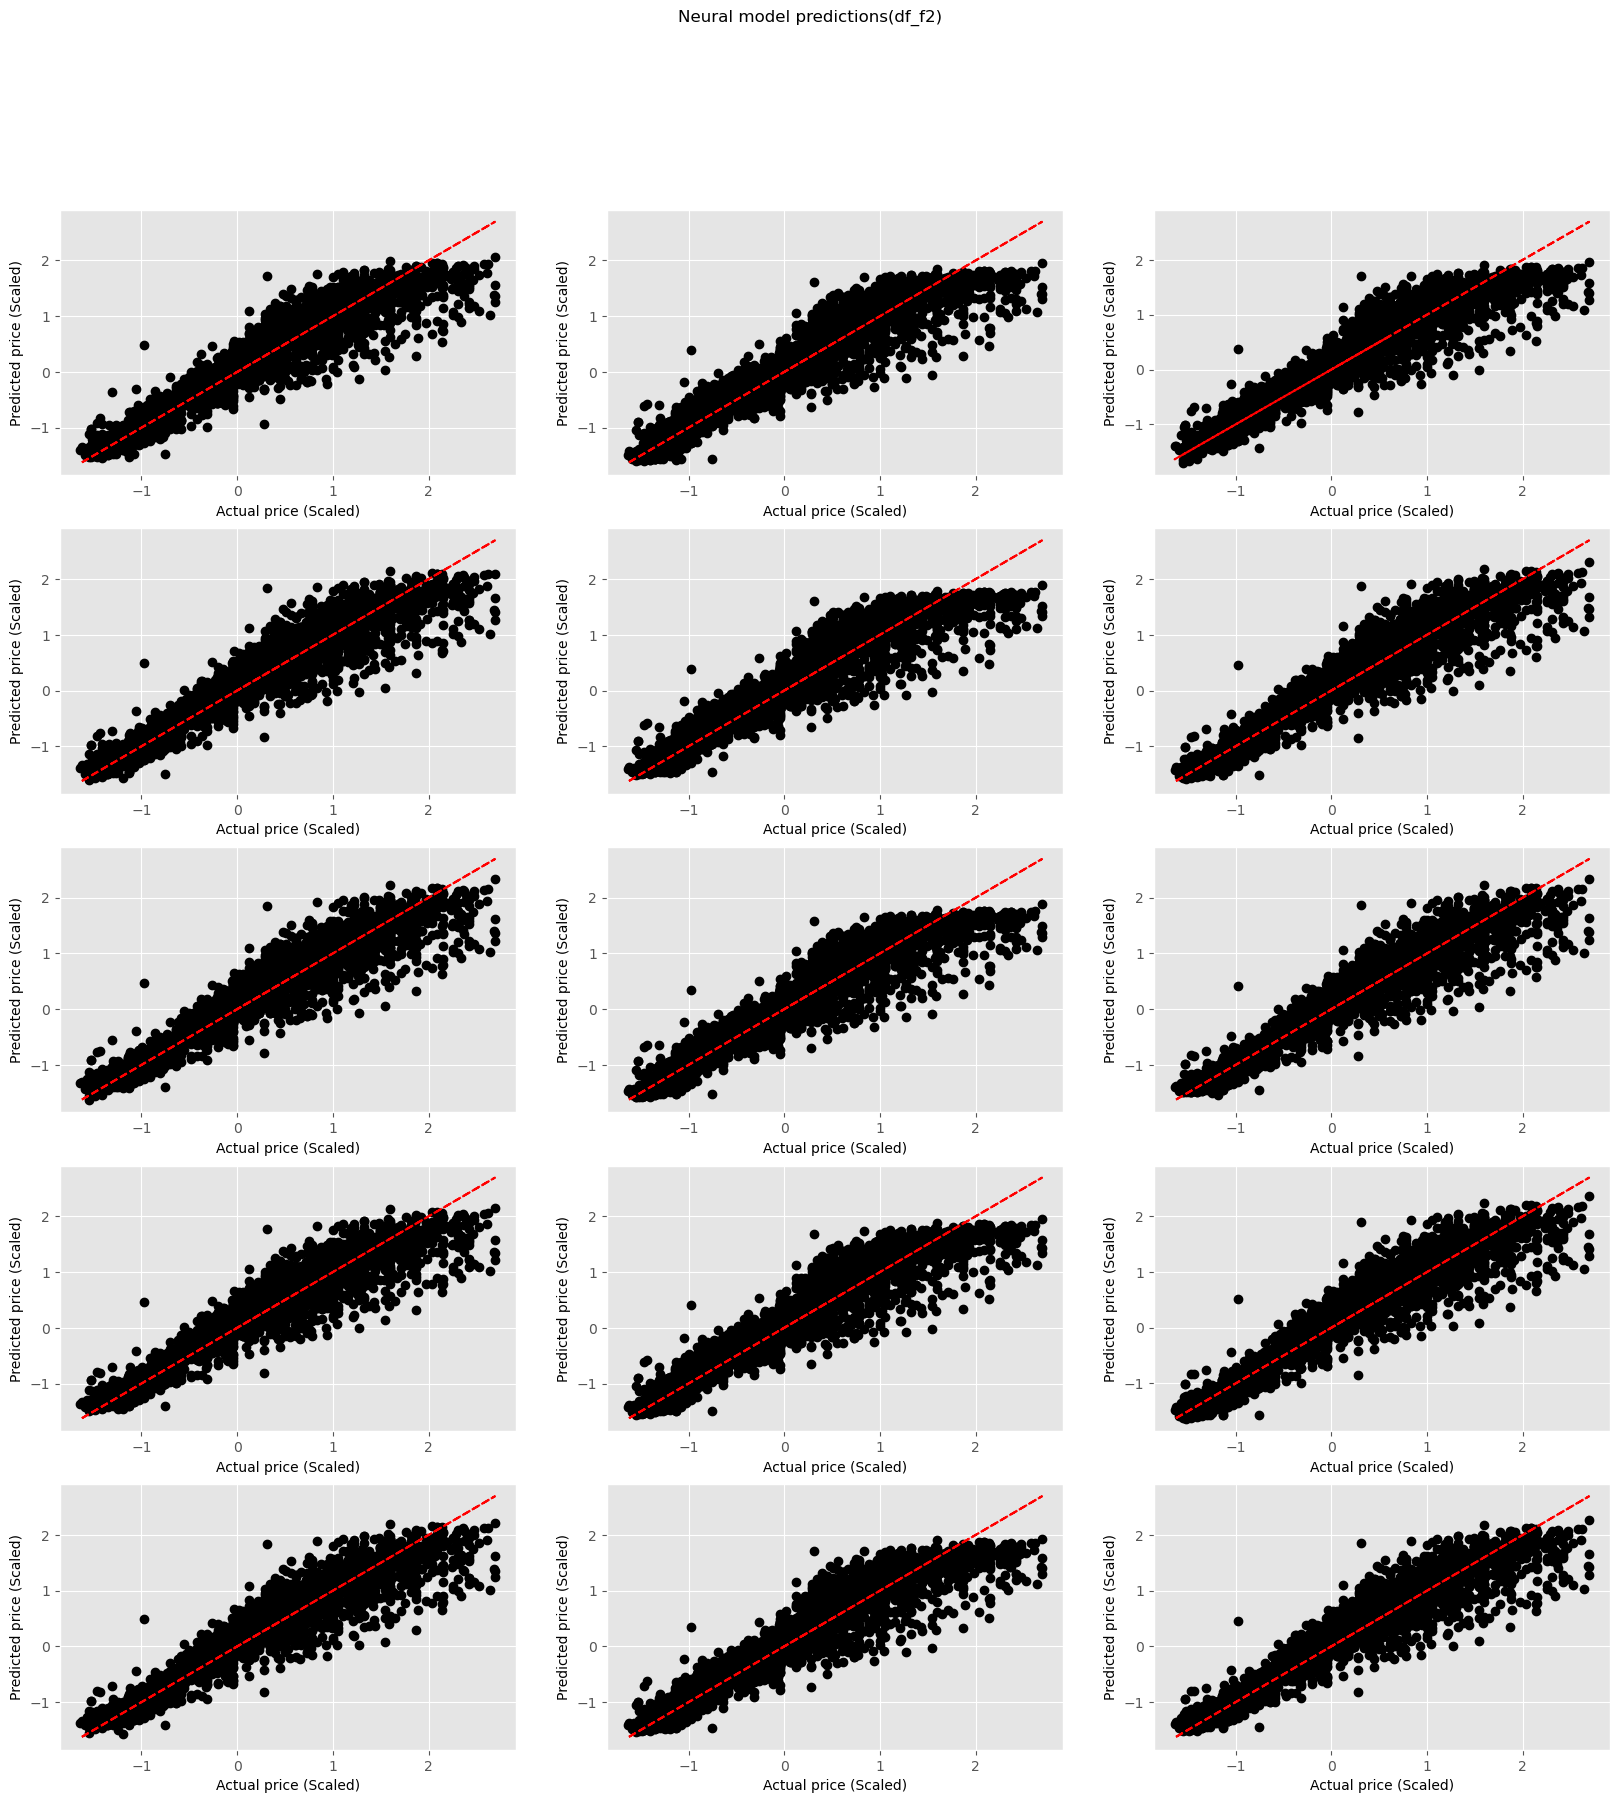

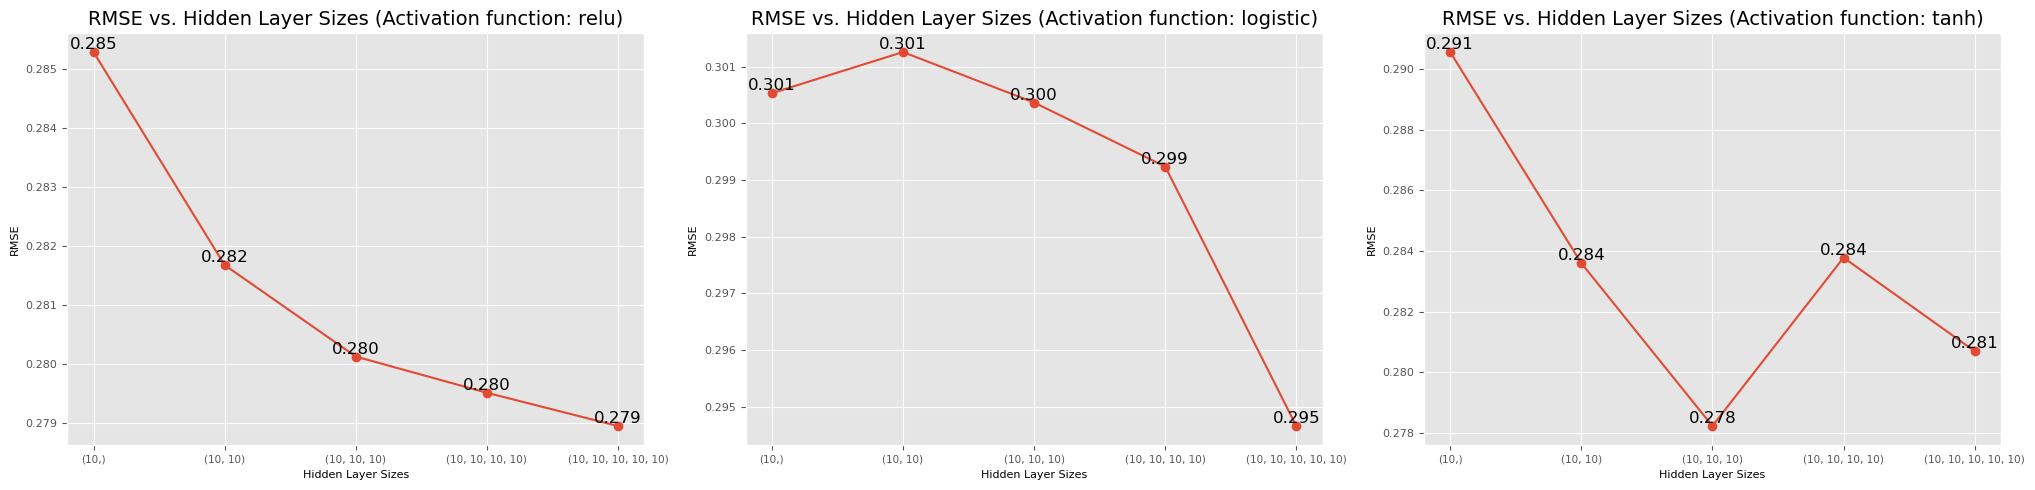

In [ ]:
#### Neural Network model for dataframe df_f2;
from sklearn.neural_network import MLPRegressor
import math

# performs split into train/test sets;
X = df_f1[['mileage', 'year']].values  ## good practice to keep X and y in numpy array;
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create list of different hidden layer sizes and activation function;
hidden_layer_sizes_list = [(10,), (10, 10), (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)]
activation_function_list = ['relu', 'logistic', 'tanh']

# train models and calculate RMSEs for each hidden layer size and activation function;
rmse_dict = {activation: [] for activation in activation_function_list}

#fig, axs = plt.subplots(5, 3, figsize=(20, 20))
fig, axs = plt.subplots(nrows=len(hidden_layer_sizes_list), ncols=len(activation_function_list), figsize=(20,20))
fig.suptitle('Neural model predictions(df_f2)')  

for i, activation in enumerate(activation_function_list):
    for j, hidden_layer_sizes in enumerate(hidden_layer_sizes_list):
        nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver='adam', max_iter=1000, random_state=42) ## at max_iter= 200 not converging, tested at 300.. we can check at where it actually converges;
        nn_model.fit(X_train, y_train)
        nn_model.fit(X_train, y_train)
        y_pred = nn_model.predict(X_test)
        mse_test = mean_squared_error(y_pred, y_test)
        rmse_test = math.sqrt(mse_test)
        rmse_dict[activation].append(rmse_test)
        print(f'MSE {activation} {hidden_layer_sizes}: {mse_test:.3f}')
        print(f'RMSE {activation} {hidden_layer_sizes}: {rmse_test:.3f}')
        
        # Plot the predictions against the actual values
        axs[j,i].plot(y_test, y_pred,'o', c='black')
        axs[j,i].plot(y_test, y_test, '--r') 
        axs[j,i].set_xlabel("Actual price (Scaled)")
        axs[j,i].set_ylabel("Predicted price (Scaled)")
        #axs[j,i].set_title("Neural model predictions(df_f2)")
plt.show()        
        
print("\n")       
        
# plot RMSE vs hidden layer sizes for each activation function;
fig, axs = plt.subplots(1, 3, figsize=(20.5, 5))

for i, activation in enumerate(activation_function_list):
    axs[i].plot([str(x) for x in hidden_layer_sizes_list], rmse_dict[activation], '-o')
    axs[i].set_xlabel('Hidden Layer Sizes', fontsize=8)
    axs[i].set_ylabel('RMSE', fontsize=8)
    axs[i].set_title(f'RMSE vs. Hidden Layer Sizes (Activation function: {activation})', fontsize=14)
    axs[i].tick_params(axis='x', labelsize=7.5)
    axs[i].tick_params(axis='y', labelsize=8)
    
    # add text annotations to the plot
    for x, y in zip(hidden_layer_sizes_list, rmse_dict[activation]):
        axs[i].text(str(x), y, f'{y:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


### Looking at the MSE and RMSE values, it appears that there is not a significant difference in performance among the activation functions. In this case, we cannot conclude that the relu activation function works better than the other two.

### However, it is important to note that the choice of activation function can have a significant impact on the performance of a neural network in other cases. Relu is a popular activation function because it tends to perform well and is computationally efficient, but other activation functions may be more appropriate for different types of problems. It is always a good idea to try different activation functions and evaluate their performance for a particular problem.

### Additionally, it appears that increasing the number of hidden layers or neurons in each layer does not necessarily improve the performance of the models, and in some cases, may even decrease performance. This could be due to overfitting, where the model becomes too complex and learns the noise in the data rather than the underlying patterns.

### It is also worth noting that the overall MSE and RMSE values seem relatively low, indicating that the models are performing well in predicting the target variable. However, it is important to consider the context and purpose of the model, and whether the performance is satisfactory for the intended application.






RMSE on test set with hidden layer sizes (100, 100) : 0.25623033494270925


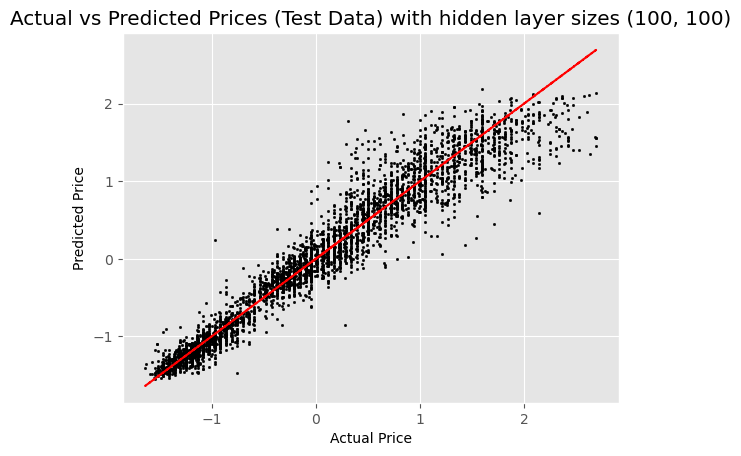

In [ ]:
# performs split into train/test sets;
X = df_f1[['year', 'mileage', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creat list of hidden layer sizes;
hidden_layer_sizes_list = [(100, 100)]

# train and evaluate neural network models for each hidden layer size;
for hidden_layer_sizes in hidden_layer_sizes_list:
    # create a neural network model;
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='tanh', solver='adam', max_iter=1000, random_state=42)

    # train model;
    nn_model.fit(X_train, y_train)

    # predict the output for the test set;
    y_pred = nn_model.predict(X_test)

    # calculate the root mean squared error on the test set;
    rmse_test = math.sqrt(mean_squared_error(y_pred, y_test))
    print("RMSE on test set with hidden layer sizes", hidden_layer_sizes, ":", rmse_test)

    # plot the results;
    plt.scatter(y_test, y_pred, s=2.5, c='black')
    plt.plot(y_test, y_test, '--r')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices (Test Data) with hidden layer sizes ' + str(hidden_layer_sizes))
    plt.show()


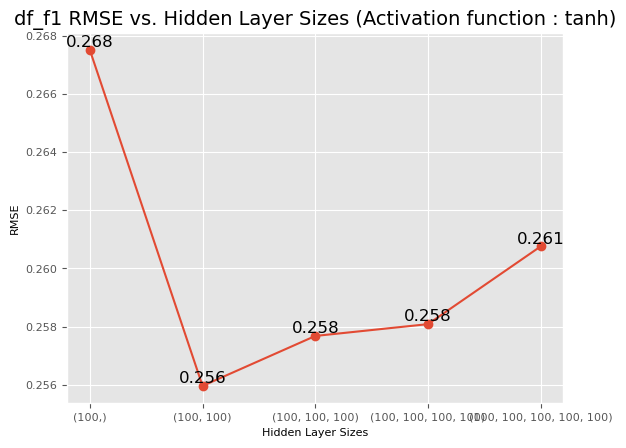

In [ ]:
# performs split into train/test sets;
X = df_f1[['mileage', 'year', 'trim_550', 'trim_430', 'trim_500']].values
y = df_f1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create different hidden layer sizes;
hidden_layer_sizes_list = [(100,), (100, 100), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)]

# train models and calculate RMSEs for each hidden layer size;
rmse_list = []
for hidden_layer_sizes in hidden_layer_sizes_list:
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='tanh', solver='adam', max_iter=1000, random_state=42)
    nn_model.fit(X_train, y_train)
    y_pred = nn_model.predict(X_test)
    rmse_test = math.sqrt(mean_squared_error(y_pred, y_test))
    rmse_list.append(rmse_test)

# plot RMSE vs. hidden layer sizes;
plt.plot([str(x) for x in hidden_layer_sizes_list], rmse_list, '-o')
plt.xlabel('Hidden Layer Sizes', fontsize=8)
plt.ylabel('RMSE', fontsize=8)
plt.title('df_f1 RMSE vs. Hidden Layer Sizes (Activation function : tanh)', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# add text annotations to the plot;
for x, y in zip(hidden_layer_sizes_list, rmse_list):
    plt.text(str(x), y, str(round(y, 3)), ha='center', va='bottom', fontsize=12)

plt.show()

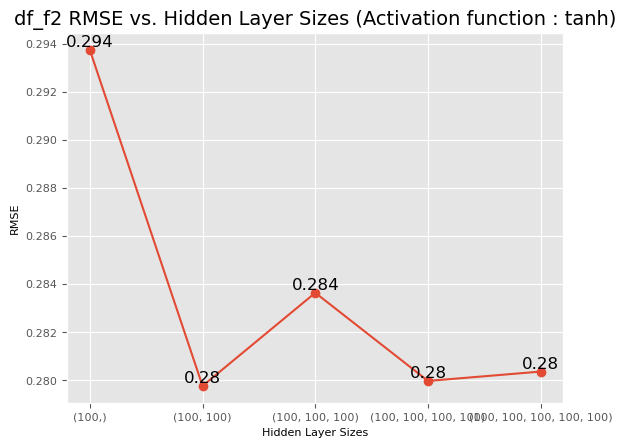

In [ ]:
# performs split into train/test sets;
X = df_f2[['mileage', 'year']].values
y = df_f2['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create different hidden layer sizes;
hidden_layer_sizes_list = [(100,), (100, 100), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)]

# train models and calculate RMSEs for each hidden layer size;
rmse_list = []
for hidden_layer_sizes in hidden_layer_sizes_list:
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='tanh', solver='adam', max_iter=1000, random_state=42)
    nn_model.fit(X_train, y_train)
    y_pred = nn_model.predict(X_test)
    rmse_test = math.sqrt(mean_squared_error(y_pred, y_test))
    rmse_list.append(rmse_test)

# plot RMSE vs. hidden layer sizes;
plt.plot([str(x) for x in hidden_layer_sizes_list], rmse_list, '-o')
plt.xlabel('Hidden Layer Sizes', fontsize=8)
plt.ylabel('RMSE', fontsize=8)
plt.title('df_f2 RMSE vs. Hidden Layer Sizes (Activation function : tanh)', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# add text annotations to the plot;
for x, y in zip(hidden_layer_sizes_list, rmse_list):
    plt.text(str(x), y, str(round(y, 3)), ha='center', va='bottom', fontsize=12)

plt.show()
